# üè† Î∂ÄÎèôÏÇ∞ Ïã§Í±∞ÎûòÍ∞Ä ÏòàÏ∏° ÎåÄÌöå - KKH - EDA
> - Îç∞Ïù¥ÌÑ∞Î•º Î∂ÑÏÑùÌï¥Î≥¥Ïûê.
> - kimkihong / helpotcreator@gmail.com / Upstage AI Lab 3Í∏∞
> - 2024.07.16.Ìôî ~ 2024.07.19.Í∏à 19:00

In [1]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fe = fm.FontEntry(fname=r'font/NanumGothic.otf', name='NanumBarunGothic')
fm.fontManager.ttflist.insert(0, fe)
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumBarunGothic'})
plt.rc('font', family='NanumBarunGothic')
import seaborn as sns

# utils
import pandas as pd
import numpy as np
from tqdm import tqdm
import pickle
import warnings;warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
import re
import math

# Model
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import FunctionTransformer, LabelEncoder
from sklearn.model_selection import train_test_split, KFold, cross_val_predict
from sklearn.metrics import mean_squared_error, roc_auc_score
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin, clone
from xgboost import XGBRegressor, XGBClassifier
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from category_encoders import TargetEncoder, OneHotEncoder, MEstimateEncoder, OrdinalEncoder, CatBoostEncoder

import eli5
from eli5.sklearn import PermutationImportance


# Î™®Îì† Ïó¥ÏùÑ ÌëúÏãúÌïòÎèÑÎ°ù ÏÑ§Ï†ï
pd.set_option('display.max_columns', None)

In [2]:
train = pd.read_csv('data/kkh_train.csv', encoding='utf-8')
test = pd.read_csv('data/kkh_test.csv', encoding='utf-8')
subway = pd.read_csv('data/subway_feature.csv', encoding='utf-8')
bus = pd.read_csv('data/bus_feature.csv', encoding='utf-8')
loan = pd.read_csv('data/kkh_loan.csv', encoding='utf-8') # ÏÑúÏö∏Ïãú Í∞ÄÍ≥ÑÎåÄÏ∂úÍ∑úÎ™®
# ÏÑúÏö∏Ïãú Í∞ÄÍ≥ÑÎåÄÏ∂úÍ∑úÎ™® Ï∂úÏ≤ò:  https://data.seoul.go.kr/dataList/10339/S/2/datasetView.do

## ÏÑúÏö∏Ïãú Í∞ÄÍ≥ÑÎåÄÏ∂úÍ∑úÎ™® Ï†ïÎ≥¥Î•º Ï∂îÍ∞ÄÌïúÎã§.

- 2008ÎÖÑ Ìè¨Ìï®ÌïòÏó¨ 2023ÎÖÑ 12ÏõîÍπåÏßÄ ÏûêÎ£åÏù¥Îã§.
- Îî∞ÎùºÏÑú, train Îç∞Ïù¥ÌÑ∞ÏóêÏÑú Í≥ÑÏïΩÎÖÑÏõîÏù¥ 200701 ~ 200712 ÏóêÎäî Í≤∞Ï∏°ÏπòÍ∞Ä Î∞úÏÉùÌï† Í≤ÉÏù¥Îã§.

In [3]:
loan.sample(2)

ÎÖÑÏõî  ÏÑúÏö∏Ïãú_Í∞ÄÍ≥ÑÎåÄÏ∂ú
0   200801  163223.8
12  200901  174921.2

In [4]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ÎÖÑÏõî        192 non-null    int64  
 1   ÏÑúÏö∏Ïãú_Í∞ÄÍ≥ÑÎåÄÏ∂ú  192 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 3.1 KB


In [5]:
# 'Í≥ÑÏïΩÎÖÑÏõî'Í≥º 'ÎÖÑÏõî'Ïù¥ ÏùºÏπòÌïòÎäî Í≤ΩÏö∞ 'ÏÑúÏö∏Ïãú_Í∞ÄÍ≥ÑÎåÄÏ∂ú' Ï†ïÎ≥¥Î•º trainÏóê Î≥ëÌï©
train = train.merge(loan, how='left', left_on='Í≥ÑÏïΩÎÖÑÏõî', right_on='ÎÖÑÏõî')
# 'ÎÖÑÏõî' Ïó¥ÏùÄ ÌïÑÏöî ÏóÜÏúºÎØÄÎ°ú ÏÇ≠Ï†ú
train.drop(columns=['ÎÖÑÏõî'], inplace=True)

In [6]:
test = test.merge(loan, how='left', left_on='Í≥ÑÏïΩÎÖÑÏõî', right_on='ÎÖÑÏõî')
test.drop(columns=['ÎÖÑÏõî'], inplace=True)

In [7]:
train.sample(2)

ÏãúÍµ∞Íµ¨   Î≤àÏßÄ     Î≥∏Î≤à   Î∂ÄÎ≤à     ÏïÑÌååÌä∏Î™Ö  Ï†ÑÏö©Î©¥Ï†Å(„é°)    Í≥ÑÏïΩÎÖÑÏõî  Í≥ÑÏïΩÏùº   Ï∏µ  \
1078284  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎÇ®Íµ¨ ÏàòÏÑúÎèô  746  746.0  0.0     ÍπåÏπòÎßàÏùÑ   39.600  200703   14  11   
242402   ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎèôÍµ¨ ÏïîÏÇ¨Îèô  413  413.0  0.0  ÌîÑÎùºÏù¥Ïñ¥Ìå∞Î¶¨Ïä§   59.983  202012   31  20   

         Í±¥Ï∂ïÎÖÑÎèÑ        ÎèÑÎ°úÎ™Ö  Ìï¥Ï†úÏÇ¨Ïú†Î∞úÏÉùÏùº Îì±Í∏∞Ïã†Ï≤≠ÏùºÏûê Í±∞ÎûòÏú†Ìòï Ï§ëÍ∞úÏÇ¨ÏÜåÏû¨ÏßÄ k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±)  \
1078284  1993  Í¥ëÌèâÎ°ú19Í∏∏ 10      NaN           -      -                NaN   
242402   2007    Í≥†ÎçïÎ°ú 130      NaN           -      -                ÏïÑÌååÌä∏   

             k-Ï†ÑÌôîÎ≤àÌò∏      k-Ìå©Ïä§Î≤àÌò∏  Îã®ÏßÄÏÜåÍ∞úÍ∏∞Ï°¥clob k-ÏÑ∏ÎåÄÌÉÄÏûÖ(Î∂ÑÏñëÌòïÌÉú) k-Í¥ÄÎ¶¨Î∞©Ïãù k-Î≥µÎèÑÏú†Ìòï k-ÎÇúÎ∞©Î∞©Ïãù  \
1078284   024590778  0262470778         NaN           Î∂ÑÏñë   ÏúÑÌÉÅÍ¥ÄÎ¶¨    Î≥µÎèÑÏãù   ÏßÄÏó≠ÎÇúÎ∞©   
242402   0234274569  0234274571         NaN           Î∂ÑÏñë   ÏúÑÌÉÅÍ¥ÄÎ¶¨    Í≥ÑÎã®Ïãù   Í∞úÎ≥ÑÎÇúÎ∞©   

         k-Ï†ÑÏ≤¥ÎèôÏàò  k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò k-Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨)  k-ÏãúÌñâÏÇ¨          k-ÏÇ¨Ïö©Í≤ÄÏÇ¨Ïùº-ÏÇ¨Ïö©ÏäπÏù∏Ïùº     k-Ïó∞Î©¥Ï†Å  \
1078284     7.0   1403.0       ÏßÑÌù•Í∏∞ÏóÖ      .  1993-09-08 00:00:00.0   83491.0   
242402     22.0   1622.0      ÌòÑÎåÄ,ÎåÄÎ¶º  ÌòÑÎåÄ,ÎåÄÎ¶º  2007-07-09 00:00:00.0  263646.0   

         k-Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å  k-Í¥ÄÎ¶¨ÎπÑÎ∂ÄÍ≥ºÎ©¥Ï†Å  k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°Ïù¥Ìïò)  k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°~85„é°Ïù¥Ìïò)  \
1078284   57555.0    81933.0              1403.0                     0.0   
242402   140765.0   181847.0               328.0                   914.0   

         k-85„é°~135„é°Ïù¥Ìïò  k-135„é°Ï¥àÍ≥º               k-ÌôàÌéòÏù¥ÏßÄ k-Îì±Î°ùÏùºÏûê  \
1078284           0.0       NaN                  NaN    NaN   
242402          380.0       NaN  www.priorpalace.net    NaN   

                        k-ÏàòÏ†ïÏùºÏûê        Í≥†Ïö©Î≥¥ÌóòÍ¥ÄÎ¶¨Î≤àÌò∏ Í≤ΩÎπÑÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú ÏÑ∏ÎåÄÏ†ÑÍ∏∞Í≥ÑÏïΩÎ∞©Î≤ï Ï≤≠ÏÜåÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú  \
1078284  2024-07-11 17:48:14.0  213-80-02528-0      ÏúÑÌÉÅ     Îã®ÏùºÍ≥ÑÏïΩ      ÏúÑÌÉÅ   
242402   2023-09-24 20:26:47.0  916-09-43852-1      ÏúÑÌÉÅ     Ï¢ÖÌï©Í≥ÑÏïΩ      ÏúÑÌÉÅ   

           Í±¥Ï∂ïÎ©¥Ï†Å    Ï£ºÏ∞®ÎåÄÏàò Í∏∞ÌÉÄ/ÏùòÎ¨¥/ÏûÑÎåÄ/ÏûÑÏùò=1/2/3/4                  Îã®ÏßÄÏäπÏù∏Ïùº ÏÇ¨Ïö©ÌóàÍ∞ÄÏó¨Î∂Ä  \
1078284     0.0   552.0                  ÏùòÎ¨¥  2017-09-15 14:51:35.0      Y   
242402   9636.9  2183.0                  ÏùòÎ¨¥  2018-03-20 14:37:59.0      Y   

        Í¥ÄÎ¶¨ÎπÑ ÏóÖÎ°úÎìú                  Îã®ÏßÄÏã†Ï≤≠Ïùº  target    Íµ¨    Îèô         Ï¢åÌëúX  \
1078284       N  2013-03-07 09:46:36.0   33000  Í∞ïÎÇ®Íµ¨  ÏàòÏÑúÎèô  127.087640   
242402        N  2013-03-07 09:46:18.0  115000  Í∞ïÎèôÍµ¨  ÏïîÏÇ¨Îèô  127.139523   

               Ï¢åÌëúY       Îèô+ÏïÑÌååÌä∏Î™Ö 1Î≤àÏß∏_Í∞ÄÍπåÏö¥_Ïó≠_Ïù¥Î¶Ñ 1Î≤àÏß∏_Í∞ÄÍπåÏö¥_Ïó≠_Ìò∏ÏÑ†  1Î≤àÏß∏_Í∞ÄÍπåÏö¥_Ïó≠_Í±∞Î¶¨  \
1078284  37.484739     ÏàòÏÑúÎèô ÍπåÏπòÎßàÏùÑ           ÏùºÏõê          3Ìò∏ÏÑ†    309.955332   
242402   37.553530  ÏïîÏÇ¨Îèô ÌîÑÎùºÏù¥Ïñ¥Ìå∞Î¶¨Ïä§           Î™ÖÏùº          5Ìò∏ÏÑ†    461.941878   

         5Î∂ÑÏù¥Ìïò_Ïó≠_Í∞úÏàò  5Î∂ÑÏ¥àÍ≥º_10Î∂ÑÏù¥Ìïò_Ïó≠_Í∞úÏàò  ÏÑúÏö∏Ïãú_Í∞ÄÍ≥ÑÎåÄÏ∂ú  
1078284          1                0       NaN  
242402           0                1  363817.0

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1118822 entries, 0 to 1118821
Data columns (total 61 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   ÏãúÍµ∞Íµ¨                     1118822 non-null  object 
 1   Î≤àÏßÄ                      1118597 non-null  object 
 2   Î≥∏Î≤à                      1118747 non-null  float64
 3   Î∂ÄÎ≤à                      1118747 non-null  float64
 4   ÏïÑÌååÌä∏Î™Ö                    1116696 non-null  object 
 5   Ï†ÑÏö©Î©¥Ï†Å(„é°)                 1118822 non-null  float64
 6   Í≥ÑÏïΩÎÖÑÏõî                    1118822 non-null  int64  
 7   Í≥ÑÏïΩÏùº                     1118822 non-null  int64  
 8   Ï∏µ                       1118822 non-null  int64  
 9   Í±¥Ï∂ïÎÖÑÎèÑ                    1118822 non-null  int64  
 10  ÎèÑÎ°úÎ™Ö                     1118822 non-null  object 
 11  Ìï¥Ï†úÏÇ¨Ïú†Î∞úÏÉùÏùº                 5983 non-null     float64
 12  Îì±Í∏∞Ïã†Ï≤≠ÏùºÏûê              

In [9]:
train.columns

Index(['ÏãúÍµ∞Íµ¨', 'Î≤àÏßÄ', 'Î≥∏Î≤à', 'Î∂ÄÎ≤à', 'ÏïÑÌååÌä∏Î™Ö', 'Ï†ÑÏö©Î©¥Ï†Å(„é°)', 'Í≥ÑÏïΩÎÖÑÏõî', 'Í≥ÑÏïΩÏùº', 'Ï∏µ', 'Í±¥Ï∂ïÎÖÑÎèÑ',
       'ÎèÑÎ°úÎ™Ö', 'Ìï¥Ï†úÏÇ¨Ïú†Î∞úÏÉùÏùº', 'Îì±Í∏∞Ïã†Ï≤≠ÏùºÏûê', 'Í±∞ÎûòÏú†Ìòï', 'Ï§ëÍ∞úÏÇ¨ÏÜåÏû¨ÏßÄ', 'k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±)',
       'k-Ï†ÑÌôîÎ≤àÌò∏', 'k-Ìå©Ïä§Î≤àÌò∏', 'Îã®ÏßÄÏÜåÍ∞úÍ∏∞Ï°¥clob', 'k-ÏÑ∏ÎåÄÌÉÄÏûÖ(Î∂ÑÏñëÌòïÌÉú)', 'k-Í¥ÄÎ¶¨Î∞©Ïãù', 'k-Î≥µÎèÑÏú†Ìòï',
       'k-ÎÇúÎ∞©Î∞©Ïãù', 'k-Ï†ÑÏ≤¥ÎèôÏàò', 'k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò', 'k-Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨)', 'k-ÏãúÌñâÏÇ¨', 'k-ÏÇ¨Ïö©Í≤ÄÏÇ¨Ïùº-ÏÇ¨Ïö©ÏäπÏù∏Ïùº',
       'k-Ïó∞Î©¥Ï†Å', 'k-Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å', 'k-Í¥ÄÎ¶¨ÎπÑÎ∂ÄÍ≥ºÎ©¥Ï†Å', 'k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°Ïù¥Ìïò)',
       'k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°~85„é°Ïù¥Ìïò)', 'k-85„é°~135„é°Ïù¥Ìïò', 'k-135„é°Ï¥àÍ≥º', 'k-ÌôàÌéòÏù¥ÏßÄ',
       'k-Îì±Î°ùÏùºÏûê', 'k-ÏàòÏ†ïÏùºÏûê', 'Í≥†Ïö©Î≥¥ÌóòÍ¥ÄÎ¶¨Î≤àÌò∏', 'Í≤ΩÎπÑÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú', 'ÏÑ∏ÎåÄÏ†ÑÍ∏∞Í≥ÑÏïΩÎ∞©Î≤ï', 'Ï≤≠ÏÜåÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú',
       'Í±¥Ï∂ïÎ©¥Ï†Å', 'Ï£ºÏ∞®ÎåÄÏàò', 'Í∏

In [10]:
print((train.isnull().mean() * 100).to_string())

ÏãúÍµ∞Íµ¨                        0.000000
Î≤àÏßÄ                         0.020110
Î≥∏Î≤à                         0.006703
Î∂ÄÎ≤à                         0.006703
ÏïÑÌååÌä∏Î™Ö                       0.190021
Ï†ÑÏö©Î©¥Ï†Å(„é°)                    0.000000
Í≥ÑÏïΩÎÖÑÏõî                       0.000000
Í≥ÑÏïΩÏùº                        0.000000
Ï∏µ                          0.000000
Í±¥Ï∂ïÎÖÑÎèÑ                       0.000000
ÎèÑÎ°úÎ™Ö                        0.000000
Ìï¥Ï†úÏÇ¨Ïú†Î∞úÏÉùÏùº                   99.465241
Îì±Í∏∞Ïã†Ï≤≠ÏùºÏûê                     0.000000
Í±∞ÎûòÏú†Ìòï                       0.000000
Ï§ëÍ∞úÏÇ¨ÏÜåÏû¨ÏßÄ                     0.000000
k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±)        77.822120
k-Ï†ÑÌôîÎ≤àÌò∏                    22.518327
k-Ìå©Ïä§Î≤àÌò∏                    23.309070
Îã®ÏßÄÏÜåÍ∞úÍ∏∞Ï°¥clob                80.389284
k-ÏÑ∏ÎåÄÌÉÄÏûÖ(Î∂ÑÏñëÌòïÌÉú)              22.559889
k-Í¥ÄÎ¶¨Î∞©Ïãù                    22.559889
k-Î≥µÎèÑÏú†Ìòï                    22.568380
k-ÎÇúÎ∞©Î∞

In [11]:
test.sample(2)

ÏãúÍµ∞Íµ¨   Î≤àÏßÄ     Î≥∏Î≤à   Î∂ÄÎ≤à    ÏïÑÌååÌä∏Î™Ö  Ï†ÑÏö©Î©¥Ï†Å(„é°)    Í≥ÑÏïΩÎÖÑÏõî  Í≥ÑÏïΩÏùº   Ï∏µ  Í±¥Ï∂ïÎÖÑÎèÑ  \
2180  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Íµ¨Î°úÍµ¨ Í∞úÎ¥âÎèô  492  492.0  0.0  Í∞úÎ¥âÌë∏Î•¥ÏßÄÏò§    59.90  202307   15  16  2014   
7225  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÏÜ°ÌååÍµ¨ Ïã†Ï≤úÎèô   17   17.0  0.0    ÌååÌÅ¨Î¶¨Ïò§    59.95  202308   16  19  2008   

            ÎèÑÎ°úÎ™Ö  Ìï¥Ï†úÏÇ¨Ïú†Î∞úÏÉùÏùº    Îì±Í∏∞Ïã†Ï≤≠ÏùºÏûê  Í±∞ÎûòÏú†Ìòï  Ï§ëÍ∞úÏÇ¨ÏÜåÏû¨ÏßÄ k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±)  \
2180  ÎÇ®Î∂ÄÏàúÌôòÎ°ú 775      NaN  20230808  Ï§ëÍ∞úÍ±∞Îûò  ÏÑúÏö∏ Íµ¨Î°úÍµ¨                NaN   
7225   Ïò¨Î¶ºÌîΩÎ°ú 435      NaN            Ï§ëÍ∞úÍ±∞Îûò  ÏÑúÏö∏ ÏÜ°ÌååÍµ¨                NaN   

          k-Ï†ÑÌôîÎ≤àÌò∏      k-Ìå©Ïä§Î≤àÌò∏  Îã®ÏßÄÏÜåÍ∞úÍ∏∞Ï°¥clob k-ÏÑ∏ÎåÄÌÉÄÏûÖ(Î∂ÑÏñëÌòïÌÉú) k-Í¥ÄÎ¶¨Î∞©Ïãù k-Î≥µÎèÑÏú†Ìòï k-ÎÇúÎ∞©Î∞©Ïãù  \
2180  0226142266  0226142268         NaN           Í∏∞ÌÉÄ     ÏßÅÏòÅ     Í∏∞ÌÉÄ     Í∏∞ÌÉÄ   
7225  0234317411  0234317415         NaN           Î∂ÑÏñë   ÏúÑÌÉÅÍ¥ÄÎ¶¨    Í≥ÑÎã®Ïãù   ÏßÄÏó≠ÎÇúÎ∞©   

      k-Ï†ÑÏ≤¥ÎèôÏàò  k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò k-Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨)               k-ÏãúÌñâÏÇ¨          k-ÏÇ¨Ïö©Í≤ÄÏÇ¨Ïùº-ÏÇ¨Ïö©ÏäπÏù∏Ïùº  \
2180    10.0    978.0       ÎåÄÏö∞Í±¥ÏÑ§          Í∞úÎ¥â1Ï£ºÌÉùÏû¨Í±¥Ï∂ïÏ°∞Ìï©  2014-05-20 00:00:00.0   
7225    66.0   6864.0     6Í∞ú ÏãúÍ≥µÏÇ¨  ÎëêÏÇ∞,ÏåçÏö©,ÏÇºÏÑ±,ÎåÄÎ¶º,ÏΩîÏò§Î°±,ÌòÑÎåÄ  2008-08-29 00:00:00.0   

          k-Ïó∞Î©¥Ï†Å  k-Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å  k-Í¥ÄÎ¶¨ÎπÑÎ∂ÄÍ≥ºÎ©¥Ï†Å  k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°Ïù¥Ìïò)  \
2180        0.0   78381.0        0.0               214.0   
7225  1142141.0  597298.0   770030.0              1388.0   

      k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°~85„é°Ïù¥Ìïò)  k-85„é°~135„é°Ïù¥Ìïò  k-135„é°Ï¥àÍ≥º             k-ÌôàÌéòÏù¥ÏßÄ  \
2180                   672.0          92.0       NaN  Í∞úÎ¥âÌë∏Î•¥ÏßÄÏò§.apti.co.kr   
7225                  4260.0         642.0       NaN      jsparkrio.com   

                     k-Îì±Î°ùÏùºÏûê                 k-ÏàòÏ†ïÏùºÏûê     Í≥†Ïö©Î≥¥ÌóòÍ¥ÄÎ¶¨Î≤àÌò∏ Í≤ΩÎπÑÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú  \
2180  2017-02-01 10:49:21.0  2020-02-17 05:37:11.0          NaN      ÏúÑÌÉÅ   
7225                    NaN  2024-07-11 18:19:01.0  90900981581      ÏúÑÌÉÅ   

     ÏÑ∏ÎåÄÏ†ÑÍ∏∞Í≥ÑÏïΩÎ∞©Î≤ï Ï≤≠ÏÜåÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú      Í±¥Ï∂ïÎ©¥Ï†Å    Ï£ºÏ∞®ÎåÄÏàò Í∏∞ÌÉÄ/ÏùòÎ¨¥/ÏûÑÎåÄ/ÏûÑÏùò=1/2/3/4  \
2180     Îã®ÏùºÍ≥ÑÏïΩ      ÏúÑÌÉÅ   7429.00  1159.0                  ÏùòÎ¨¥   
7225      NaN      ÏúÑÌÉÅ  35664.99  9486.0                  ÏùòÎ¨¥   

                      Îã®ÏßÄÏäπÏù∏Ïùº ÏÇ¨Ïö©ÌóàÍ∞ÄÏó¨Î∂Ä Í¥ÄÎ¶¨ÎπÑ ÏóÖÎ°úÎìú                  Îã®ÏßÄÏã†Ï≤≠Ïùº         Ï¢åÌëúX  \
2180  2015-02-23 09:10:06.0      Y       N  2015-01-21 10:58:19.0  126.848139   
7225  2015-10-05 11:58:48.0      Y       N  2013-03-07 09:46:37.0  127.106178   

            Ï¢åÌëúY    Íµ¨    Îèô      Îèô+ÏïÑÌååÌä∏Î™Ö 1Î≤àÏß∏_Í∞ÄÍπåÏö¥_Ïó≠_Ïù¥Î¶Ñ 1Î≤àÏß∏_Í∞ÄÍπåÏö¥_Ïó≠_Ìò∏ÏÑ†  1Î≤àÏß∏_Í∞ÄÍπåÏö¥_Ïó≠_Í±∞Î¶¨  \
2180  37.500427  Íµ¨Î°úÍµ¨  Í∞úÎ¥âÎèô  Í∞úÎ¥âÎèô Í∞úÎ¥âÌë∏Î•¥ÏßÄÏò§          Ïò§Î•òÎèô          Í≤ΩÏù∏ÏÑ†    700.311637   
7225  37.520550  ÏÜ°ÌååÍµ¨  Ïã†Ï≤úÎèô    Ïã†Ï≤úÎèô ÌååÌÅ¨Î¶¨Ïò§         Ïû†Ïã§ÎÇòÎ£®          2Ìò∏ÏÑ†    211.605164   

      5Î∂ÑÏù¥Ìïò_Ïó≠_Í∞úÏàò  5Î∂ÑÏ¥àÍ≥º_10Î∂ÑÏù¥Ìïò_Ïó≠_Í∞úÏàò  ÏÑúÏö∏Ïãú_Í∞ÄÍ≥ÑÎåÄÏ∂ú  
2180          0                0  404538.4  
7225          1                1  406315.8

In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9272 entries, 0 to 9271
Data columns (total 60 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ÏãúÍµ∞Íµ¨                     9272 non-null   object 
 1   Î≤àÏßÄ                      9272 non-null   object 
 2   Î≥∏Î≤à                      9272 non-null   float64
 3   Î∂ÄÎ≤à                      9272 non-null   float64
 4   ÏïÑÌååÌä∏Î™Ö                    9272 non-null   object 
 5   Ï†ÑÏö©Î©¥Ï†Å(„é°)                 9272 non-null   float64
 6   Í≥ÑÏïΩÎÖÑÏõî                    9272 non-null   int64  
 7   Í≥ÑÏïΩÏùº                     9272 non-null   int64  
 8   Ï∏µ                       9272 non-null   int64  
 9   Í±¥Ï∂ïÎÖÑÎèÑ                    9272 non-null   int64  
 10  ÎèÑÎ°úÎ™Ö                     9272 non-null   object 
 11  Ìï¥Ï†úÏÇ¨Ïú†Î∞úÏÉùÏùº                 212 non-null    float64
 12  Îì±Í∏∞Ïã†Ï≤≠ÏùºÏûê                  9272 non-null   object 
 13  Í

In [13]:
test.columns

Index(['ÏãúÍµ∞Íµ¨', 'Î≤àÏßÄ', 'Î≥∏Î≤à', 'Î∂ÄÎ≤à', 'ÏïÑÌååÌä∏Î™Ö', 'Ï†ÑÏö©Î©¥Ï†Å(„é°)', 'Í≥ÑÏïΩÎÖÑÏõî', 'Í≥ÑÏïΩÏùº', 'Ï∏µ', 'Í±¥Ï∂ïÎÖÑÎèÑ',
       'ÎèÑÎ°úÎ™Ö', 'Ìï¥Ï†úÏÇ¨Ïú†Î∞úÏÉùÏùº', 'Îì±Í∏∞Ïã†Ï≤≠ÏùºÏûê', 'Í±∞ÎûòÏú†Ìòï', 'Ï§ëÍ∞úÏÇ¨ÏÜåÏû¨ÏßÄ', 'k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±)',
       'k-Ï†ÑÌôîÎ≤àÌò∏', 'k-Ìå©Ïä§Î≤àÌò∏', 'Îã®ÏßÄÏÜåÍ∞úÍ∏∞Ï°¥clob', 'k-ÏÑ∏ÎåÄÌÉÄÏûÖ(Î∂ÑÏñëÌòïÌÉú)', 'k-Í¥ÄÎ¶¨Î∞©Ïãù', 'k-Î≥µÎèÑÏú†Ìòï',
       'k-ÎÇúÎ∞©Î∞©Ïãù', 'k-Ï†ÑÏ≤¥ÎèôÏàò', 'k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò', 'k-Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨)', 'k-ÏãúÌñâÏÇ¨', 'k-ÏÇ¨Ïö©Í≤ÄÏÇ¨Ïùº-ÏÇ¨Ïö©ÏäπÏù∏Ïùº',
       'k-Ïó∞Î©¥Ï†Å', 'k-Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å', 'k-Í¥ÄÎ¶¨ÎπÑÎ∂ÄÍ≥ºÎ©¥Ï†Å', 'k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°Ïù¥Ìïò)',
       'k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°~85„é°Ïù¥Ìïò)', 'k-85„é°~135„é°Ïù¥Ìïò', 'k-135„é°Ï¥àÍ≥º', 'k-ÌôàÌéòÏù¥ÏßÄ',
       'k-Îì±Î°ùÏùºÏûê', 'k-ÏàòÏ†ïÏùºÏûê', 'Í≥†Ïö©Î≥¥ÌóòÍ¥ÄÎ¶¨Î≤àÌò∏', 'Í≤ΩÎπÑÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú', 'ÏÑ∏ÎåÄÏ†ÑÍ∏∞Í≥ÑÏïΩÎ∞©Î≤ï', 'Ï≤≠ÏÜåÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú',
       'Í±¥Ï∂ïÎ©¥Ï†Å', 'Ï£ºÏ∞®ÎåÄÏàò', 'Í∏

In [14]:
subway.head(2)

Ïó≠ÏÇ¨_ID Ïó≠ÏÇ¨Î™Ö   Ìò∏ÏÑ†         ÏúÑÎèÑ          Í≤ΩÎèÑ
0   9996  ÎØ∏ÏÇ¨  5Ìò∏ÏÑ†  37.560927  127.193877
1   9995  Í∞ïÏùº  5Ìò∏ÏÑ†  37.557490  127.175930

In [15]:
bus.head(2)

ÎÖ∏Îìú ID  Ï†ïÎ•òÏÜåÎ≤àÌò∏         Ï†ïÎ•òÏÜåÎ™Ö         XÏ¢åÌëú        YÏ¢åÌëú Ï†ïÎ•òÏÜå ÌÉÄÏûÖ
0  100000001   1001      Ï¢ÖÎ°ú2Í∞ÄÏÇ¨Í±∞Î¶¨  126.987752  37.569808   Ï§ëÏïôÏ∞®Î°ú
1  100000002   1002  Ï∞ΩÍ≤ΩÍ∂Å.ÏÑúÏö∏ÎåÄÌïôÍµêÎ≥ëÏõê  126.996566  37.579183   Ï§ëÏïôÏ∞®Î°ú

In [16]:
def eda_kkh(df: pd.DataFrame):
    desc = pd.DataFrame(index = list(df))
    desc['type'] = df.dtypes
    desc['count'] = df.count()
    desc['nunique'] = df.nunique()
    desc['%unique'] = desc['nunique'] /len(df) * 100
    desc['null'] = df.isnull().sum()
    desc['%null'] = desc['null'] / len(df) * 100
    desc = pd.concat([desc, df.describe().T.drop('count',axis=1)],axis=1)
    return desc.sort_values(by=['type','null']).style.background_gradient(cmap='YlOrBr')\
        .bar(subset=['mean'],color='green')\
        .bar(subset=['max'],color='red')\
        .bar(subset=['min'], color='purple')

eda_kkh(train)

In [17]:
eda_kkh(test)

In [18]:
train['Í≥ÑÏïΩÎÖÑ'] = train['Í≥ÑÏïΩÎÖÑÏõî'].astype('str').map(lambda x : x[:4]).astype('int')
train['Í≥ÑÏïΩÏõî'] = train['Í≥ÑÏïΩÎÖÑÏõî'].astype('str').map(lambda x : x[4:]).astype('int')

test['Í≥ÑÏïΩÎÖÑ'] = test['Í≥ÑÏïΩÎÖÑÏõî'].astype('str').map(lambda x : x[:4]).astype('int')
test['Í≥ÑÏïΩÏõî'] = test['Í≥ÑÏïΩÎÖÑÏõî'].astype('str').map(lambda x : x[4:]).astype('int')

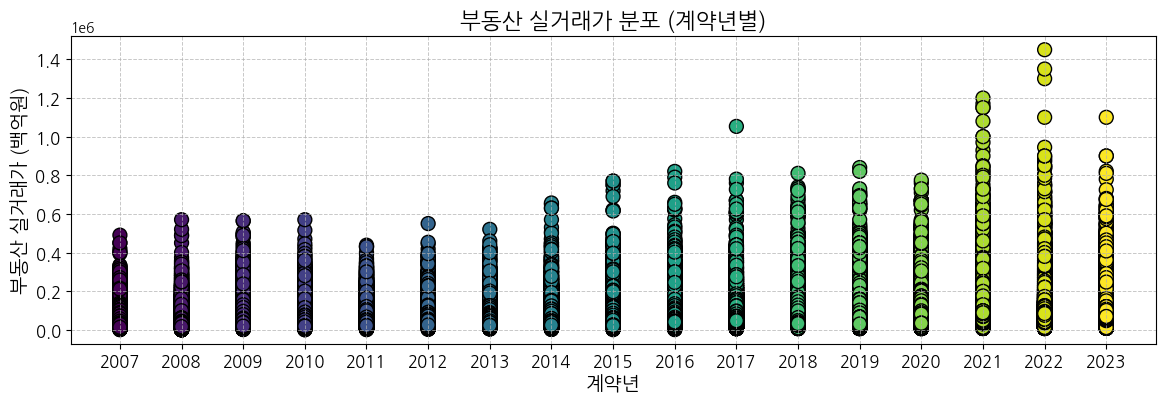

In [19]:
# Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ: 'Í≥ÑÏïΩÎÖÑ'Í≥º 'target'ÏùÑ Ìè¨Ìï®Ìïú Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑÏùÑ ÏÉùÏÑ±Ìï©ÎãàÎã§.
data = train[['Í≥ÑÏïΩÎÖÑ', 'target']].dropna()

# ÏÉâÏÉÅ Îßµ ÏÑ§Ï†ï
cmap = plt.get_cmap('viridis')

# 'Í≥ÑÏïΩÎÖÑ'Ïùò Î≤îÏúÑÎ•º 0ÏóêÏÑú 1 ÏÇ¨Ïù¥Î°ú Ï†ïÍ∑úÌôîÌïòÏó¨ ÏÉâÏÉÅÏóê Îß§Ìïë
norm = plt.Normalize(data['Í≥ÑÏïΩÎÖÑ'].min(), data['Í≥ÑÏïΩÎÖÑ'].max())
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

plt.figure(figsize=(14, 4))
scatter = plt.scatter(data['Í≥ÑÏïΩÎÖÑ'], data['target'], c=data['Í≥ÑÏïΩÎÖÑ'], cmap=cmap, norm=norm, s=100, edgecolor='black')

# Ï†úÎ™© Î∞è Ï∂ï Î†àÏù¥Î∏î ÏÑ§Ï†ï
plt.title('Î∂ÄÎèôÏÇ∞ Ïã§Í±∞ÎûòÍ∞Ä Î∂ÑÌè¨ (Í≥ÑÏïΩÎÖÑÎ≥Ñ)', fontsize=16, fontweight='bold')
plt.xlabel('Í≥ÑÏïΩÎÖÑ', fontsize=14)
plt.ylabel('Î∂ÄÎèôÏÇ∞ Ïã§Í±∞ÎûòÍ∞Ä (Î∞±ÏñµÏõê)', fontsize=14)

# xÏ∂ï ÎààÍ∏à ÏÑ§Ï†ï
years = sorted(data['Í≥ÑÏïΩÎÖÑ'].unique())
plt.xticks(ticks=years, labels=[str(year) for year in years], fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.7, alpha=0.7)
plt.show()

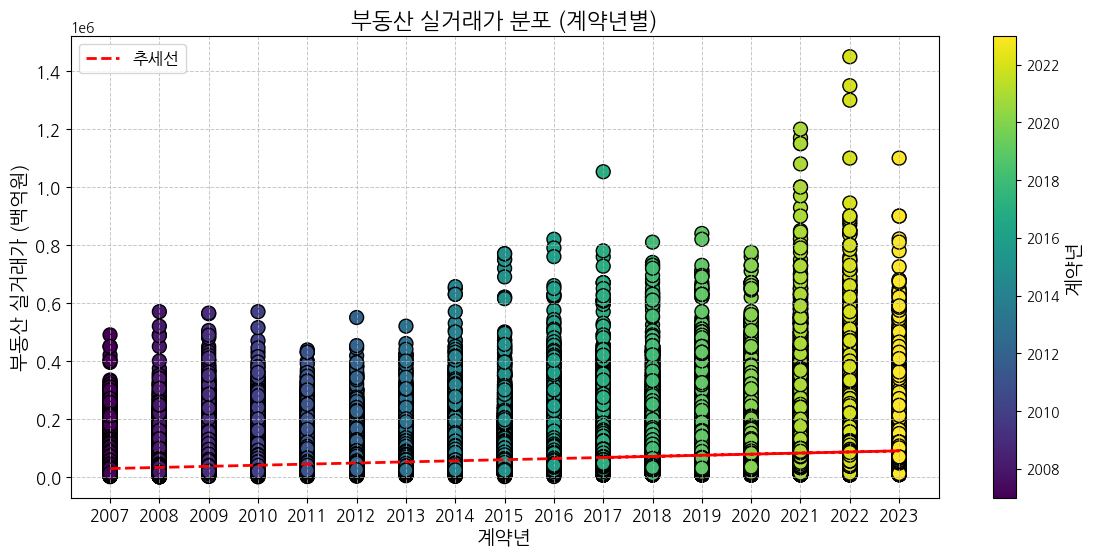

In [20]:
# Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ: 'Í≥ÑÏïΩÎÖÑ'Í≥º 'target'ÏùÑ Ìè¨Ìï®Ìïú Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑÏùÑ ÏÉùÏÑ±Ìï©ÎãàÎã§.
data = train[['Í≥ÑÏïΩÎÖÑ', 'target']].dropna()

# ÏÉâÏÉÅ Îßµ ÏÑ§Ï†ï
cmap = plt.get_cmap('viridis')

# 'Í≥ÑÏïΩÎÖÑ'Ïùò Î≤îÏúÑÎ•º 0ÏóêÏÑú 1 ÏÇ¨Ïù¥Î°ú Ï†ïÍ∑úÌôîÌïòÏó¨ ÏÉâÏÉÅÏóê Îß§Ìïë
norm = plt.Normalize(data['Í≥ÑÏïΩÎÖÑ'].min(), data['Í≥ÑÏïΩÎÖÑ'].max())

# ÌöåÍ∑Ä Î∂ÑÏÑù
coefficients = np.polyfit(data['Í≥ÑÏïΩÎÖÑ'], data['target'], 1)  # 1Ï∞® Îã§Ìï≠Ïãù(ÏßÅÏÑ†) ÌöåÍ∑Ä
polynomial = np.poly1d(coefficients)
regression_line = polynomial(data['Í≥ÑÏïΩÎÖÑ'])

# Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
plt.figure(figsize=(14, 6))
scatter = plt.scatter(data['Í≥ÑÏïΩÎÖÑ'], data['target'], c=data['Í≥ÑÏïΩÎÖÑ'], cmap=cmap, norm=norm, s=100, edgecolor='black')

# Ï∂îÏÑ∏ÏÑ† Í∑∏Î¶¨Í∏∞
plt.plot(data['Í≥ÑÏïΩÎÖÑ'], regression_line, color='red', linewidth=2, linestyle='--', label='Ï∂îÏÑ∏ÏÑ†')

# Ïª¨Îü¨Î∞î Ï∂îÍ∞Ä
cbar = plt.colorbar(scatter)
cbar.set_label('Í≥ÑÏïΩÎÖÑ', fontsize=14)

# Ï†úÎ™© Î∞è Ï∂ï Î†àÏù¥Î∏î ÏÑ§Ï†ï
plt.title('Î∂ÄÎèôÏÇ∞ Ïã§Í±∞ÎûòÍ∞Ä Î∂ÑÌè¨ (Í≥ÑÏïΩÎÖÑÎ≥Ñ)', fontsize=16, fontweight='bold')
plt.xlabel('Í≥ÑÏïΩÎÖÑ', fontsize=14)
plt.ylabel('Î∂ÄÎèôÏÇ∞ Ïã§Í±∞ÎûòÍ∞Ä (Î∞±ÏñµÏõê)', fontsize=14)

# xÏ∂ï ÎààÍ∏à ÏÑ§Ï†ï
years = sorted(data['Í≥ÑÏïΩÎÖÑ'].unique())
plt.xticks(ticks=years, labels=[str(year) for year in years], fontsize=12)
plt.yticks(fontsize=12)

# Í∑∏Î¶¨Îìú Î∞è Î≤îÎ°Ä ÏÑ§Ï†ï
plt.grid(True, linestyle='--', linewidth=0.7, alpha=0.7)
plt.legend(fontsize=12)

# Ï∞®Ìä∏ ÌëúÏãú
plt.show()


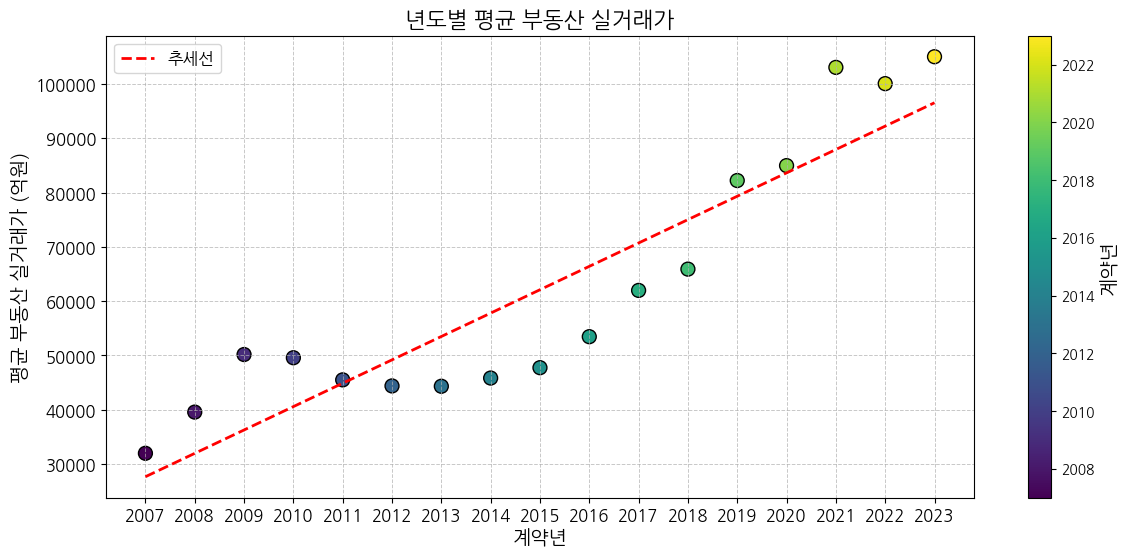

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ: 'Í≥ÑÏïΩÎÖÑ'Í≥º 'target'ÏùÑ Ìè¨Ìï®Ìïú Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑÏùÑ ÏÉùÏÑ±Ìï©ÎãàÎã§.
data = train[['Í≥ÑÏïΩÎÖÑ', 'target']].dropna()

# ÎÖÑÎèÑÎ≥Ñ ÌèâÍ∑† Í∞ÄÍ≤© Í≥ÑÏÇ∞
yearly_avg_price = data.groupby('Í≥ÑÏïΩÎÖÑ')['target'].mean().sort_index()

# ÏÉâÏÉÅ Îßµ ÏÑ§Ï†ï
cmap = plt.get_cmap('viridis')

# 'Í≥ÑÏïΩÎÖÑ'Ïùò Î≤îÏúÑÎ•º 0ÏóêÏÑú 1 ÏÇ¨Ïù¥Î°ú Ï†ïÍ∑úÌôîÌïòÏó¨ ÏÉâÏÉÅÏóê Îß§Ìïë
norm = plt.Normalize(yearly_avg_price.index.min(), yearly_avg_price.index.max())

# ÌöåÍ∑Ä Î∂ÑÏÑù
coefficients = np.polyfit(yearly_avg_price.index, yearly_avg_price.values, 1)  # 1Ï∞® Îã§Ìï≠Ïãù(ÏßÅÏÑ†) ÌöåÍ∑Ä
polynomial = np.poly1d(coefficients)
regression_line = polynomial(yearly_avg_price.index)

# Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
plt.figure(figsize=(14, 6))
scatter = plt.scatter(yearly_avg_price.index, yearly_avg_price.values, c=yearly_avg_price.index, cmap=cmap, norm=norm, s=100, edgecolor='black')

# Ï∂îÏÑ∏ÏÑ† Í∑∏Î¶¨Í∏∞
plt.plot(yearly_avg_price.index, regression_line, color='red', linewidth=2, linestyle='--', label='Ï∂îÏÑ∏ÏÑ†')

# Ïª¨Îü¨Î∞î Ï∂îÍ∞Ä
cbar = plt.colorbar(scatter)
cbar.set_label('Í≥ÑÏïΩÎÖÑ', fontsize=14)

# Ï†úÎ™© Î∞è Ï∂ï Î†àÏù¥Î∏î ÏÑ§Ï†ï
plt.title('ÎÖÑÎèÑÎ≥Ñ ÌèâÍ∑† Î∂ÄÎèôÏÇ∞ Ïã§Í±∞ÎûòÍ∞Ä', fontsize=16, fontweight='bold')
plt.xlabel('Í≥ÑÏïΩÎÖÑ', fontsize=14)
plt.ylabel('ÌèâÍ∑† Î∂ÄÎèôÏÇ∞ Ïã§Í±∞ÎûòÍ∞Ä (ÏñµÏõê)', fontsize=14)

# xÏ∂ï ÎààÍ∏à ÏÑ§Ï†ï
years = sorted(yearly_avg_price.index)
plt.xticks(ticks=years, labels=[str(year) for year in years], fontsize=12)
plt.yticks(fontsize=12)

# Í∑∏Î¶¨Îìú Î∞è Î≤îÎ°Ä ÏÑ§Ï†ï
plt.grid(True, linestyle='--', linewidth=0.7, alpha=0.7)
plt.legend(fontsize=12)

# Ï∞®Ìä∏ ÌëúÏãú
plt.show()


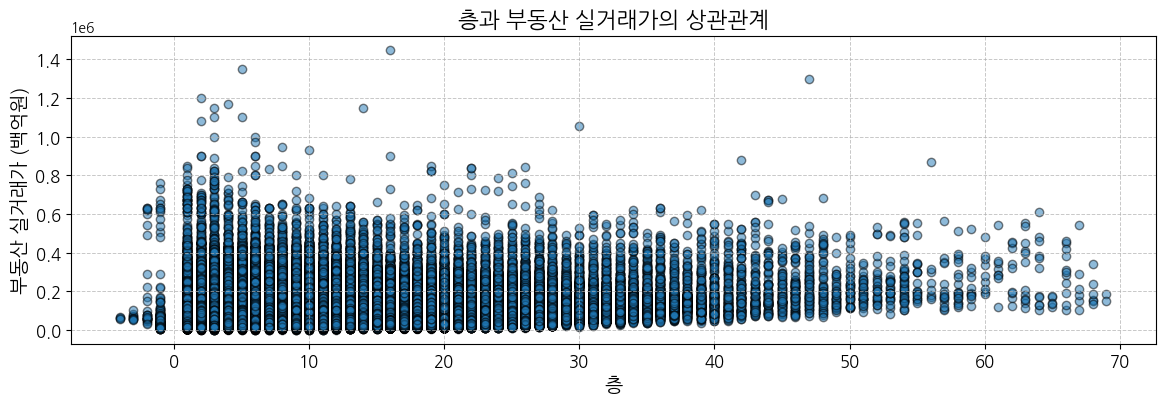

In [22]:
# Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ: 'Ï∏µ'Í≥º 'target'ÏùÑ Ìè¨Ìï®Ìïú Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑÏùÑ ÏÉùÏÑ±Ìï©ÎãàÎã§.
data = train[['Ï∏µ', 'target']].dropna()

plt.figure(figsize=(14, 4))
plt.scatter(data['Ï∏µ'], data['target'], alpha=0.5, edgecolor='black')

# Ï†úÎ™© Î∞è Ï∂ï Î†àÏù¥Î∏î ÏÑ§Ï†ï
plt.title('Ï∏µÍ≥º Î∂ÄÎèôÏÇ∞ Ïã§Í±∞ÎûòÍ∞ÄÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ', fontsize=16, fontweight='bold')
plt.xlabel('Ï∏µ', fontsize=14)
plt.ylabel('Î∂ÄÎèôÏÇ∞ Ïã§Í±∞ÎûòÍ∞Ä (Î∞±ÏñµÏõê)', fontsize=14)

# xÏ∂ïÍ≥º yÏ∂ï Î†àÏù¥Î∏îÏùò Ìè∞Ìä∏ ÌÅ¨Í∏∞ ÏÑ§Ï†ï
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.7, alpha=0.7)
plt.show()


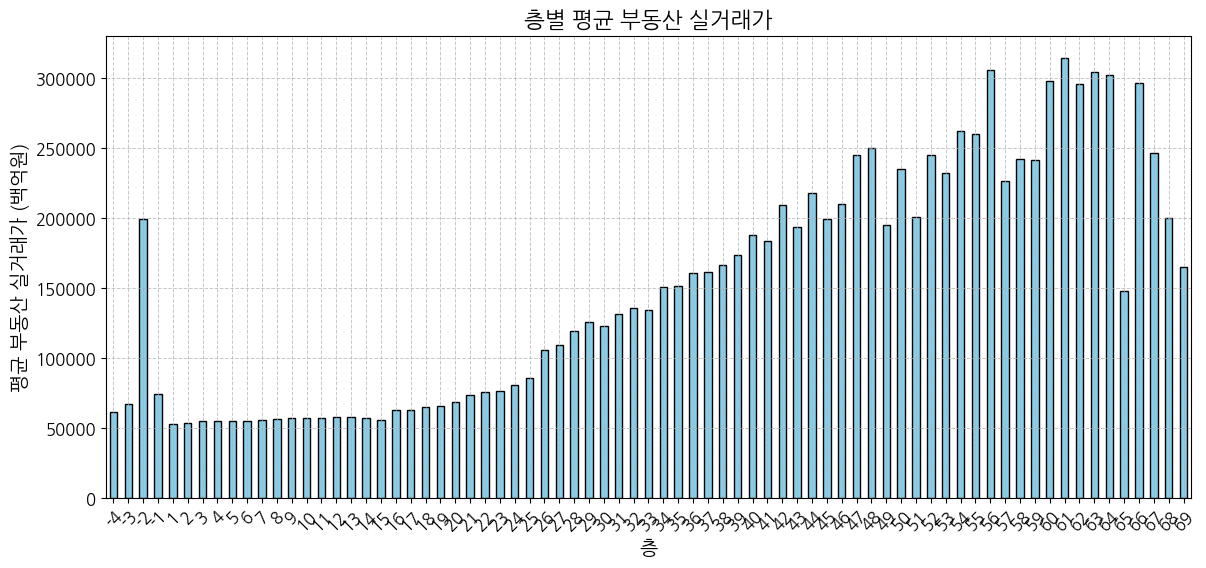

In [23]:
import matplotlib.pyplot as plt

# Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ: 'Ï∏µ'Í≥º 'target'ÏùÑ Ìè¨Ìï®Ìïú Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑÏùÑ ÏÉùÏÑ±Ìï©ÎãàÎã§.
data = train[['Ï∏µ', 'target']].dropna()

# Ï∏µÎ≥Ñ ÌèâÍ∑† Í±∞ÎûòÍ∞ÄÎ•º Í≥ÑÏÇ∞Ìï©ÎãàÎã§.
mean_prices_per_floor = data.groupby('Ï∏µ')['target'].mean()

plt.figure(figsize=(14, 6))
mean_prices_per_floor.plot(kind='bar', color='skyblue', edgecolor='black')

# Ï†úÎ™© Î∞è Ï∂ï Î†àÏù¥Î∏î ÏÑ§Ï†ï
plt.title('Ï∏µÎ≥Ñ ÌèâÍ∑† Î∂ÄÎèôÏÇ∞ Ïã§Í±∞ÎûòÍ∞Ä', fontsize=16, fontweight='bold')
plt.xlabel('Ï∏µ', fontsize=14)
plt.ylabel('ÌèâÍ∑† Î∂ÄÎèôÏÇ∞ Ïã§Í±∞ÎûòÍ∞Ä (Î∞±ÏñµÏõê)', fontsize=14)

# xÏ∂ïÍ≥º yÏ∂ï Î†àÏù¥Î∏îÏùò Ìè∞Ìä∏ ÌÅ¨Í∏∞ ÏÑ§Ï†ï
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)

# Í∑∏Î¶¨Îìú Ï∂îÍ∞Ä
plt.grid(True, linestyle='--', linewidth=0.7, alpha=0.7)

# Ï∞®Ìä∏ ÌëúÏãú
plt.show()


In [24]:
floor = 2
print(f'{floor}Ï∏µ ÎØ∏Îßå: ', train[(floor == train['Ï∏µ']) & (train['Ï†ÑÏö©Î©¥Ï†Å(„é°)'] > 10)]['target'].mean())
print(f'{floor}Ï∏µ Ïù¥ÏÉÅ: ', train[(floor < train['Ï∏µ']) & (train['Ï†ÑÏö©Î©¥Ï†Å(„é°)'] > 10)]['target'].mean())

2Ï∏µ ÎØ∏Îßå:  53645.097589469995
2Ï∏µ Ïù¥ÏÉÅ:  58679.398935340454


In [25]:
floor_diff_value_list = dict()
for floor in range(1, 100, 1):
    diff = train[((floor+1) == train['Ï∏µ']) & (train['Ï†ÑÏö©Î©¥Ï†Å(„é°)'] > 10)]['target'].mean() - train[(floor == train['Ï∏µ']) & (train['Ï†ÑÏö©Î©¥Ï†Å(„é°)'] > 10)]['target'].mean()
    if np.isnan(diff):
        break
    floor_diff_value_list[floor] = int(diff)

print(floor_diff_value_list)

{1: 769, 2: 1413, 3: -358, 4: 589, 5: -446, 6: 502, 7: 866, 8: 931, 9: 58, 10: 258, 11: 296, 12: -170, 13: -460, 14: -1223, 15: 7164, 16: -169, 17: 1742, 18: 1171, 19: 2419, 20: 5135, 21: 2231, 22: 1029, 23: 4264, 24: 5110, 25: 19354, 26: 3577, 27: 10545, 28: 6295, 29: -2880, 30: 8414, 31: 4131, 32: -1443, 33: 16650, 34: 527, 35: 9371, 36: 597, 37: 4955, 38: 7222, 39: 14409, 40: -4423, 41: 26081, 42: -15990, 43: 24077, 44: -18092, 45: 10715, 46: 35104, 47: 4414, 48: -54621, 49: 40098, 50: -34468, 51: 44140, 52: -12884, 53: 30348, 54: -2166, 55: 45433, 56: -79092, 57: 15381, 58: -607, 59: 56540, 60: 16402, 61: -18513, 62: 8638, 63: -2159, 64: -154430, 65: 148521, 66: -50098, 67: -45875, 68: -35208}


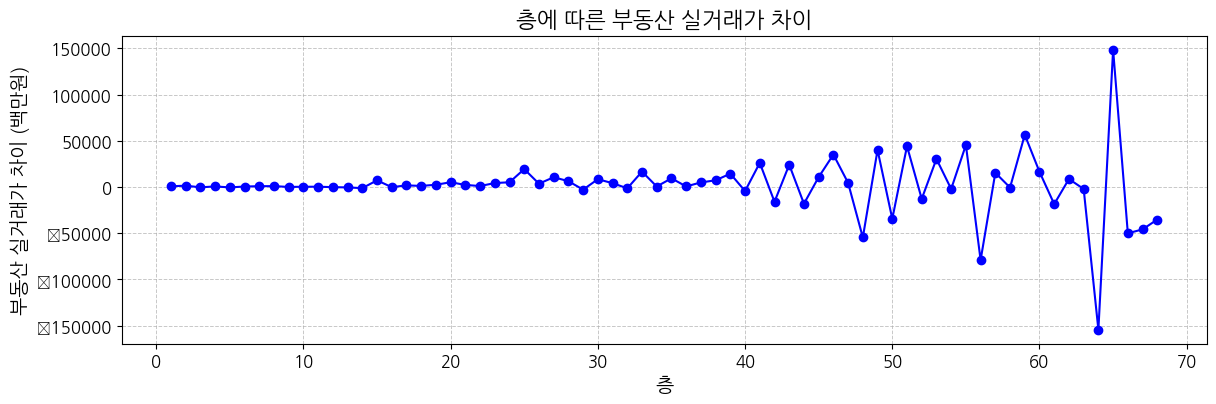

In [26]:
plt.figure(figsize=(14, 4))
plt.plot(floor_diff_value_list.keys(), floor_diff_value_list.values(), marker='o', linestyle='-', color='b')

# Ï†úÎ™© Î∞è Ï∂ï Î†àÏù¥Î∏î ÏÑ§Ï†ï
plt.title('Ï∏µÏóê Îî∞Î•∏ Î∂ÄÎèôÏÇ∞ Ïã§Í±∞ÎûòÍ∞Ä Ï∞®Ïù¥', fontsize=16, fontweight='bold')
plt.xlabel('Ï∏µ', fontsize=14)
plt.ylabel('Î∂ÄÎèôÏÇ∞ Ïã§Í±∞ÎûòÍ∞Ä Ï∞®Ïù¥ (Î∞±ÎßåÏõê)', fontsize=14)

# xÏ∂ïÍ≥º yÏ∂ï Î†àÏù¥Î∏îÏùò Ìè∞Ìä∏ ÌÅ¨Í∏∞ ÏÑ§Ï†ï
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Í∑∏Î¶¨Îìú Ï∂îÍ∞Ä
plt.grid(True, linestyle='--', linewidth=0.7, alpha=0.7)

# Ï∞®Ìä∏ ÌëúÏãú
plt.show()

In [27]:
floor_diff_value_list = dict()
for floor in range(2, 100, 1):
    diff = train[(floor < train['Ï∏µ']) & (train['Ï†ÑÏö©Î©¥Ï†Å(„é°)'] > 10)]['target'].mean() - train[(floor >= train['Ï∏µ']) & (train['Ï†ÑÏö©Î©¥Ï†Å(„é°)'] > 10)]['target'].mean()
    if np.isnan(diff):
        break
    floor_diff_value_list[floor] = int(diff)

print(floor_diff_value_list)

{2: 5328, 3: 5043, 4: 5280, 5: 5509, 6: 6007, 7: 6507, 8: 6950, 9: 7365, 10: 7997, 11: 8842, 12: 9992, 13: 11608, 14: 14087, 15: 18241, 16: 20236, 17: 23095, 18: 26616, 19: 31024, 20: 36339, 21: 41136, 22: 47311, 23: 55389, 24: 64839, 25: 75622, 26: 81332, 27: 87989, 28: 93401, 29: 98240, 30: 104461, 31: 109654, 32: 115417, 33: 122489, 34: 128141, 35: 135103, 36: 141531, 37: 147241, 38: 152995, 39: 158903, 40: 162616, 41: 167528, 42: 169708, 43: 174406, 44: 176325, 45: 181102, 46: 186487, 47: 186345, 48: 185539, 49: 191283, 50: 193005, 51: 200248, 52: 201853, 53: 205649, 54: 206006, 55: 206564, 56: 203919, 57: 208799, 58: 214070, 59: 218366, 60: 215615, 61: 210383, 62: 205755, 63: 193894, 64: 175481, 65: 192642, 66: 156849, 67: 133415, 68: 107008}


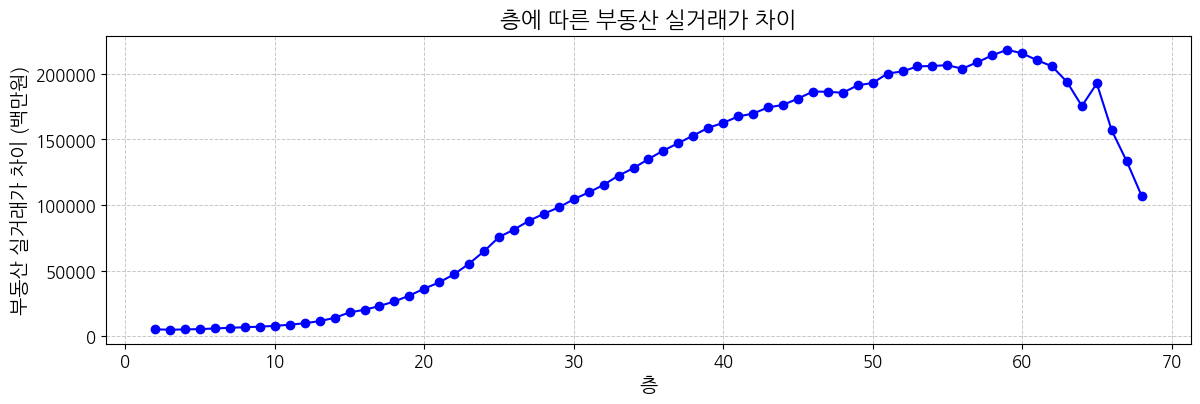

In [28]:
plt.figure(figsize=(14, 4))
plt.plot(floor_diff_value_list.keys(), floor_diff_value_list.values(), marker='o', linestyle='-', color='b')

# Ï†úÎ™© Î∞è Ï∂ï Î†àÏù¥Î∏î ÏÑ§Ï†ï
plt.title('Ï∏µÏóê Îî∞Î•∏ Î∂ÄÎèôÏÇ∞ Ïã§Í±∞ÎûòÍ∞Ä Ï∞®Ïù¥', fontsize=16, fontweight='bold')
plt.xlabel('Ï∏µ', fontsize=14)
plt.ylabel('Î∂ÄÎèôÏÇ∞ Ïã§Í±∞ÎûòÍ∞Ä Ï∞®Ïù¥ (Î∞±ÎßåÏõê)', fontsize=14)

# xÏ∂ïÍ≥º yÏ∂ï Î†àÏù¥Î∏îÏùò Ìè∞Ìä∏ ÌÅ¨Í∏∞ ÏÑ§Ï†ï
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Í∑∏Î¶¨Îìú Ï∂îÍ∞Ä
plt.grid(True, linestyle='--', linewidth=0.7, alpha=0.7)

# Ï∞®Ìä∏ ÌëúÏãú
plt.show()

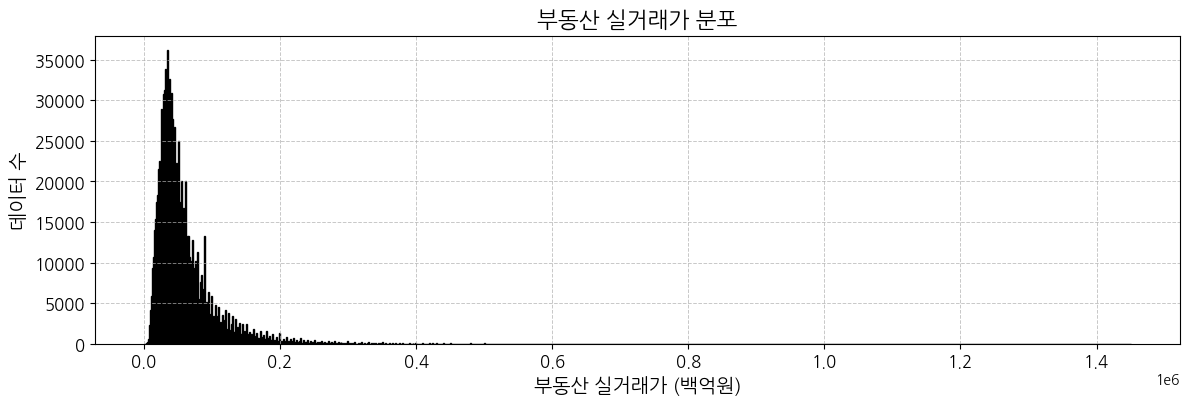

In [29]:
# Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ: 'target'ÏùÑ Ìè¨Ìï®Ìïú Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑÏùÑ ÏÉùÏÑ±Ìï©ÎãàÎã§.
data = train[['target']].dropna()

# ÌûàÏä§ÌÜ†Í∑∏Îû®ÏùÑ ÏÉùÏÑ±Ìï©ÎãàÎã§.
plt.figure(figsize=(14, 4))
plt.hist(data['target'], bins=1000, edgecolor='black')

# Ï†úÎ™© Î∞è Ï∂ï Î†àÏù¥Î∏î ÏÑ§Ï†ï
plt.title('Î∂ÄÎèôÏÇ∞ Ïã§Í±∞ÎûòÍ∞Ä Î∂ÑÌè¨', fontsize=16, fontweight='bold')
plt.xlabel('Î∂ÄÎèôÏÇ∞ Ïã§Í±∞ÎûòÍ∞Ä (Î∞±ÏñµÏõê)', fontsize=14)
plt.ylabel('Îç∞Ïù¥ÌÑ∞ Ïàò', fontsize=14)

# xÏ∂ïÍ≥º yÏ∂ï Î†àÏù¥Î∏îÏùò Ìè∞Ìä∏ ÌÅ¨Í∏∞ ÏÑ§Ï†ï
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Í∑∏Î¶¨Îìú Ï∂îÍ∞Ä
plt.grid(True, linestyle='--', linewidth=0.7, alpha=0.7)

# Ï∞®Ìä∏ ÌëúÏãú
plt.show()

###  == ÏúÑ Ï∞®Ìä∏ Î∂ÑÏÑù Í≤∞Í≥º ==

- ÏñëÏùò ÏôúÎèÑ(Right skewed) ÌòïÌÉúÏù¥Îã§.
- 0 ~ 10Ïñµ ÏÇ¨Ïù¥Ïùò Îç∞Ïù¥ÌÑ∞Í∞Ä Í∞ÄÏû• ÎßéÎã§.
- 20Ïñµ Ïù¥ÏÉÅÌïòÎäî Î∂ÄÎèôÏÇ∞ÏùÄ Îç∞Ïù¥ÌÑ∞ ÏñëÏù¥ Ï†ÅÏúºÎãà, ÏòàÏ∏°Ïù¥ Ïñ¥Î†§Ïö∏ Í≤ÉÏù¥Îã§.

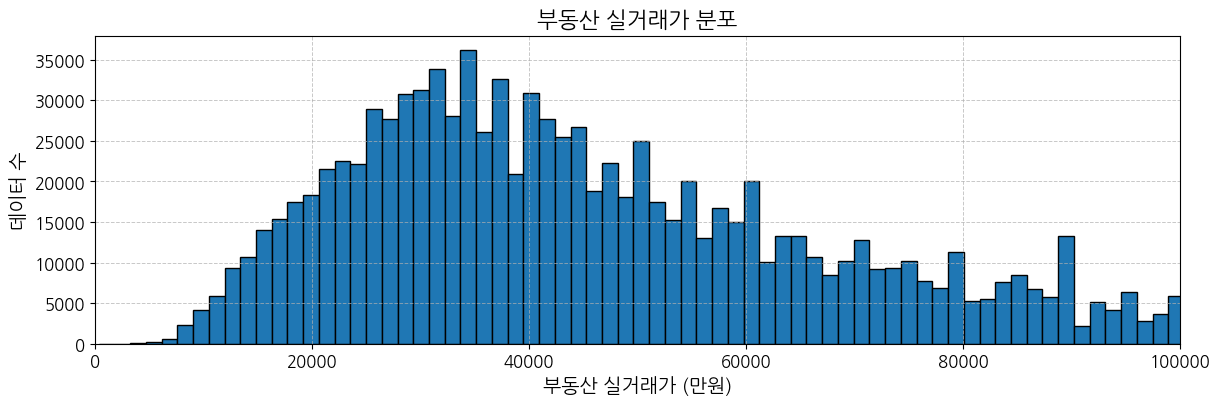

In [30]:
# Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ: 'target'ÏùÑ Ìè¨Ìï®Ìïú Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑÏùÑ ÏÉùÏÑ±Ìï©ÎãàÎã§.
data = train[['target']].dropna()

# ÌûàÏä§ÌÜ†Í∑∏Îû®ÏùÑ ÏÉùÏÑ±Ìï©ÎãàÎã§.
plt.figure(figsize=(14, 4))
plt.hist(data['target'], bins=1000, edgecolor='black')

# Ï†úÎ™© Î∞è Ï∂ï Î†àÏù¥Î∏î ÏÑ§Ï†ï
plt.title('Î∂ÄÎèôÏÇ∞ Ïã§Í±∞ÎûòÍ∞Ä Î∂ÑÌè¨', fontsize=16, fontweight='bold')
plt.xlabel('Î∂ÄÎèôÏÇ∞ Ïã§Í±∞ÎûòÍ∞Ä (ÎßåÏõê)', fontsize=14)
plt.ylabel('Îç∞Ïù¥ÌÑ∞ Ïàò', fontsize=14)

# xÏ∂ïÍ≥º yÏ∂ï Î†àÏù¥Î∏îÏùò Ìè∞Ìä∏ ÌÅ¨Í∏∞ ÏÑ§Ï†ï
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(0, 100000)
plt.grid(True, linestyle='--', linewidth=0.7, alpha=0.7)
plt.show()

### == ÏúÑ Ï∞®Ìä∏ Î∂ÑÏÑù Í≤∞Í≥º ==

- ÏïûÏÑú ÏÇ¥Ìé¥Î≥¥ÏïòÎçò Ï∞®Ìä∏ÏóêÏÑú, Í∞ÄÏû• Îç∞Ïù¥ÌÑ∞Í∞Ä ÎßéÏïòÎçò Î∂ÄÎ∂ÑÎßå ÌôïÎåÄÌïú Ï∞®Ìä∏Ïù¥Îã§.
- 3Ïñµ ~ 4Ïñµ Î∂ÄÍ∑ºÏùò Îç∞Ïù¥ÌÑ∞Í∞Ä Í∞ÄÏû• ÎßéÎã§.

In [31]:
print('targetÏùò max: ', train['target'].max())
print('targetÏùò min: ', train['target'].min())

targetÏùò max:  1450000
targetÏùò min:  350


In [32]:
print(train[train['target'] < 1000])

                     ÏãúÍµ∞Íµ¨      Î≤àÏßÄ      Î≥∏Î≤à    Î∂ÄÎ≤à   ÏïÑÌååÌä∏Î™Ö  Ï†ÑÏö©Î©¥Ï†Å(„é°)    Í≥ÑÏïΩÎÖÑÏõî  Í≥ÑÏïΩÏùº  \
197746     ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÏùÄÌèâÍµ¨ Íµ¨ÏÇ∞Îèô  199-24   199.0  24.0     Ïã†Ìò∏   88.930  200812    1   
197747     ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÏùÄÌèâÍµ¨ Íµ¨ÏÇ∞Îèô  199-24   199.0  24.0     Ïã†Ìò∏   83.700  200812    1   
197748     ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÏùÄÌèâÍµ¨ Íµ¨ÏÇ∞Îèô  199-24   199.0  24.0     Ïã†Ìò∏   83.700  200812    1   
197749     ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÏùÄÌèâÍµ¨ Íµ¨ÏÇ∞Îèô  199-24   199.0  24.0     Ïã†Ìò∏  100.530  200812    1   
197750     ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÏùÄÌèâÍµ¨ Íµ¨ÏÇ∞Îèô  199-24   199.0  24.0     Ïã†Ìò∏  100.530  200812    1   
197751     ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÏùÄÌèâÍµ¨ Íµ¨ÏÇ∞Îèô  199-24   199.0  24.0     Ïã†Ìò∏   83.700  200812    1   
197752     ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÏùÄÌèâÍµ¨ Íµ¨ÏÇ∞Îèô  199-24   199.0  24.0     Ïã†Ìò∏  100.530  200812    1   
197753     ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÏùÄÌèâÍµ¨ Íµ¨ÏÇ∞Îèô  199-24   199.0  24.0     Ïã†Ìò∏  100.530  200812    1   
197754     ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÏùÄÌ

In [33]:
print('Í≥ÑÏïΩÎÖÑÏõîÏùò max: ', train['Í≥ÑÏïΩÎÖÑÏõî'].max())
print('Í≥ÑÏïΩÎÖÑÏõîÏùò min: ', train['Í≥ÑÏïΩÎÖÑÏõî'].min())

Í≥ÑÏïΩÎÖÑÏõîÏùò max:  202306
Í≥ÑÏïΩÎÖÑÏõîÏùò min:  200701


In [34]:
print('ÏïÑÌååÌä∏ Ï¢ÖÎ•ò: ', len(train['ÏïÑÌååÌä∏Î™Ö'].unique()))
display(train['ÏïÑÌååÌä∏Î™Ö'].value_counts()[:10])

ÏïÑÌååÌä∏ Ï¢ÖÎ•ò:  6539


ÌòÑÎåÄ       16644
Ïã†ÎèôÏïÑ      12846
ÌïúÏã†        9074
ÎëêÏÇ∞        8533
Ï£ºÍ≥µ2       7918
Ïö∞ÏÑ±        7768
Î≤ΩÏÇ∞        7285
ÏÇºÏÑ±ÎûòÎØ∏Ïïà     7143
ÎåÄÎ¶º        6305
Í∑πÎèô        5669
Name: ÏïÑÌååÌä∏Î™Ö, dtype: int64

In [35]:
train['Íµ¨'].value_counts()[:10]

ÎÖ∏ÏõêÍµ¨    115099
ÏÜ°ÌååÍµ¨     73785
Í∞ïÎÇ®Íµ¨     69083
Í∞ïÏÑúÍµ¨     66610
Í∞ïÎèôÍµ¨     61895
Íµ¨Î°úÍµ¨     57604
ÏÑ±Î∂ÅÍµ¨     56675
ÏñëÏ≤úÍµ¨     53977
ÏÑúÏ¥àÍµ¨     53126
ÎèÑÎ¥âÍµ¨     52572
Name: Íµ¨, dtype: int64

In [36]:
train['Îèô'].value_counts()[:10]

ÏÉÅÍ≥ÑÎèô    44948
Ï§ëÍ≥ÑÎèô    26357
Ïã†Ï†ïÎèô    24038
Ï∞ΩÎèô     23101
Íµ¨Î°úÎèô    22811
Î¥âÏ≤úÎèô    20511
Î™©Îèô     17246
ÏõîÍ≥ÑÎèô    17056
ÏÑúÏ¥àÎèô    15899
Í≥µÎ¶âÎèô    15763
Name: Îèô, dtype: int64

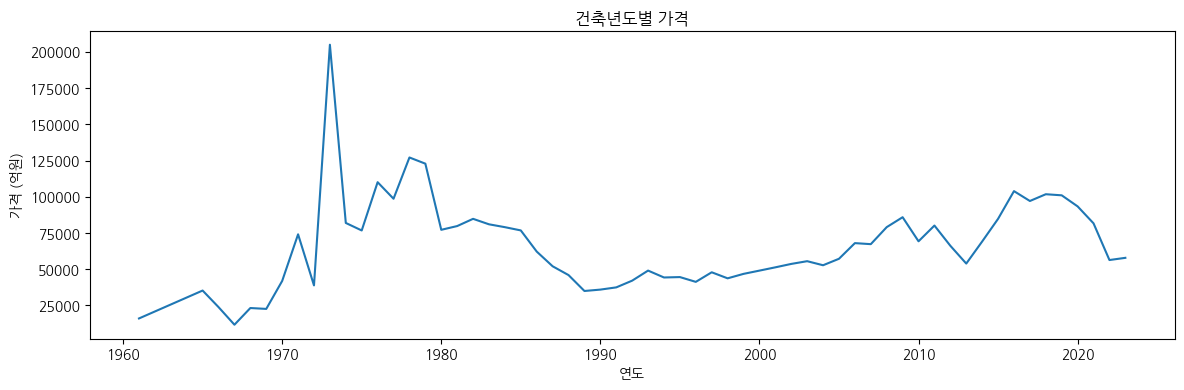

In [37]:
train_yearly = train.groupby(train['Í±¥Ï∂ïÎÖÑÎèÑ'])['target'].mean()

plt.figure(figsize=(14, 4))
plt.plot(train_yearly.index, train_yearly.values)
plt.xlabel('Ïó∞ÎèÑ')
plt.ylabel('Í∞ÄÍ≤© (ÏñµÏõê)')
plt.title('Í±¥Ï∂ïÎÖÑÎèÑÎ≥Ñ Í∞ÄÍ≤©')
plt.show()

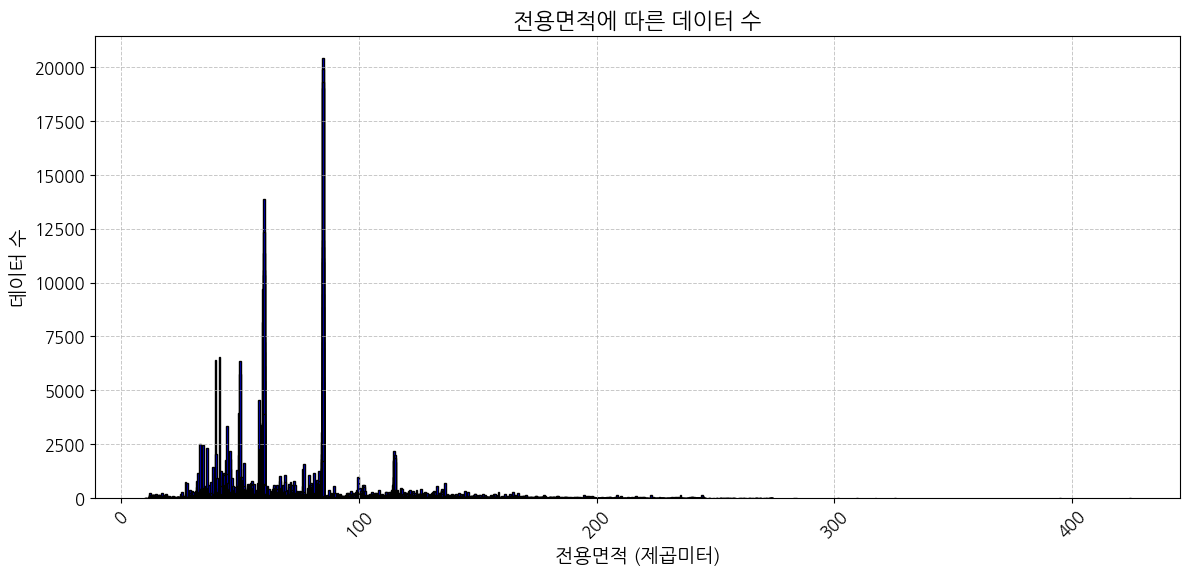

In [38]:
# Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ: 'area'ÏôÄ 'target'ÏùÑ Ìè¨Ìï®Ìïú Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑÏùÑ ÏÉùÏÑ±Ìï©ÎãàÎã§.
data = train[['Ï†ÑÏö©Î©¥Ï†Å(„é°)']].dropna()

# Ï†ÑÏö©Î©¥Ï†ÅÎ≥Ñ Îç∞Ïù¥ÌÑ∞ ÏàòÎ•º Í≥ÑÏÇ∞Ìï©ÎãàÎã§.
area_counts = data['Ï†ÑÏö©Î©¥Ï†Å(„é°)'].value_counts().sort_index()

# ÎùºÏù∏ Ï∞®Ìä∏Î•º Í∑∏Î¶ΩÎãàÎã§.
plt.figure(figsize=(14, 6))
plt.bar(area_counts.index, area_counts.values, color='b', edgecolor='black')

# Ï†úÎ™© Î∞è Ï∂ï Î†àÏù¥Î∏î ÏÑ§Ï†ï
plt.title('Ï†ÑÏö©Î©¥Ï†ÅÏóê Îî∞Î•∏ Îç∞Ïù¥ÌÑ∞ Ïàò', fontsize=16, fontweight='bold')
plt.xlabel('Ï†ÑÏö©Î©¥Ï†Å (Ï†úÍ≥±ÎØ∏ÌÑ∞)', fontsize=14)
plt.ylabel('Îç∞Ïù¥ÌÑ∞ Ïàò', fontsize=14)

# xÏ∂ïÍ≥º yÏ∂ï Î†àÏù¥Î∏îÏùò Ìè∞Ìä∏ ÌÅ¨Í∏∞ ÏÑ§Ï†ï
plt.xticks(fontsize=12, rotation=45)  # xÏ∂ï Î†àÏù¥Î∏îÏùÑ Îçî Ïûò Î≥¥Ïù¥ÎèÑÎ°ù ÌöåÏ†Ñ
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.7, alpha=0.7)
plt.show()

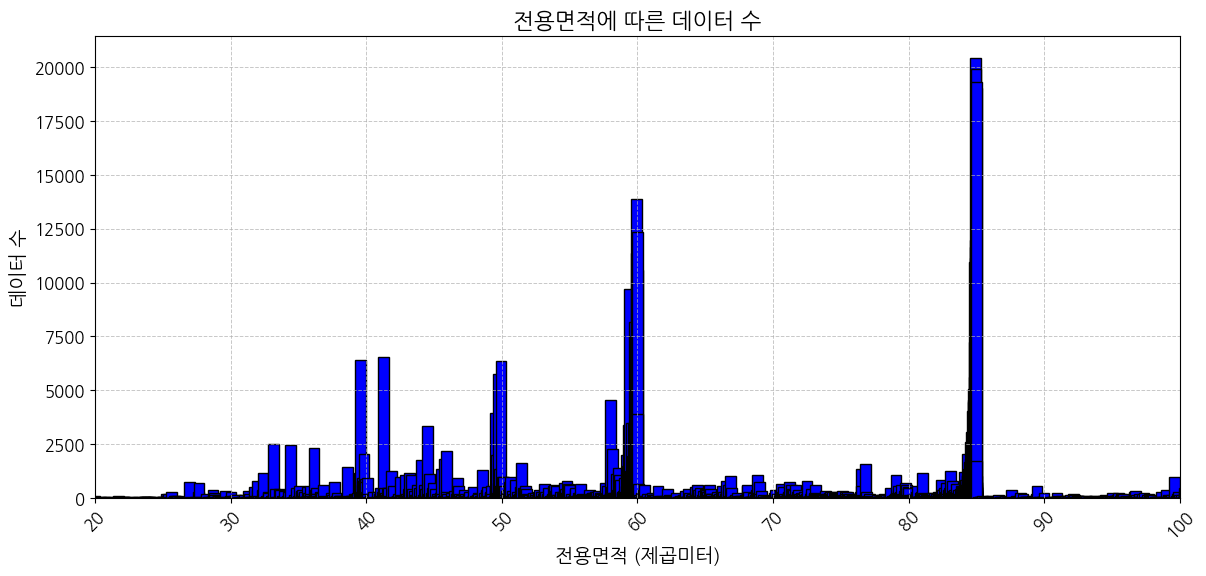

In [39]:
# Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ: 'area'ÏôÄ 'target'ÏùÑ Ìè¨Ìï®Ìïú Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑÏùÑ ÏÉùÏÑ±Ìï©ÎãàÎã§.
data = train[['Ï†ÑÏö©Î©¥Ï†Å(„é°)']].dropna()

# Ï†ÑÏö©Î©¥Ï†ÅÎ≥Ñ Îç∞Ïù¥ÌÑ∞ ÏàòÎ•º Í≥ÑÏÇ∞Ìï©ÎãàÎã§.
area_counts = data['Ï†ÑÏö©Î©¥Ï†Å(„é°)'].value_counts().sort_index()

# ÎùºÏù∏ Ï∞®Ìä∏Î•º Í∑∏Î¶ΩÎãàÎã§.
plt.figure(figsize=(14, 6))
plt.bar(area_counts.index, area_counts.values, color='b', edgecolor='black')

# Ï†úÎ™© Î∞è Ï∂ï Î†àÏù¥Î∏î ÏÑ§Ï†ï
plt.title('Ï†ÑÏö©Î©¥Ï†ÅÏóê Îî∞Î•∏ Îç∞Ïù¥ÌÑ∞ Ïàò', fontsize=16, fontweight='bold')
plt.xlabel('Ï†ÑÏö©Î©¥Ï†Å (Ï†úÍ≥±ÎØ∏ÌÑ∞)', fontsize=14)
plt.ylabel('Îç∞Ïù¥ÌÑ∞ Ïàò', fontsize=14)

# xÏ∂ïÍ≥º yÏ∂ï Î†àÏù¥Î∏îÏùò Ìè∞Ìä∏ ÌÅ¨Í∏∞ ÏÑ§Ï†ï
plt.xticks(fontsize=12, rotation=45)  # xÏ∂ï Î†àÏù¥Î∏îÏùÑ Îçî Ïûò Î≥¥Ïù¥ÎèÑÎ°ù ÌöåÏ†Ñ
plt.yticks(fontsize=12)
plt.xlim(20, 100)
plt.grid(True, linestyle='--', linewidth=0.7, alpha=0.7)
plt.show()

In [40]:
train['ÏÑ∏ÎåÄÎ≥ÑÏ£ºÏ∞®ÎåÄÏàò'] = train['Ï£ºÏ∞®ÎåÄÏàò'] / train['k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò']
test['ÏÑ∏ÎåÄÎ≥ÑÏ£ºÏ∞®ÎåÄÏàò'] = test['Ï£ºÏ∞®ÎåÄÏàò'] / test['k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò']

In [41]:
# 'Îèô+ÏïÑÌååÌä∏Î™Ö' Í∏∞Ï§ÄÏúºÎ°ú Í∑∏Î£πÌôîÌïòÏó¨ 'target' ÌîºÏ≤òÏùò ÌèâÍ∑† Í∞ÄÍ≤© Í≥ÑÏÇ∞
mean_target_per_group = train.groupby('Îèô+ÏïÑÌååÌä∏Î™Ö')['target'].mean()

# ÌèâÍ∑† Í∞ÄÍ≤©Ïù¥ 200,000 Ïù¥ÏÉÅÏù∏ Í∑∏Î£πÏùÑ Î¶¨Ïä§Ìä∏Î°ú ÏÉùÏÑ±
high_price_groups = mean_target_per_group[mean_target_per_group >= 200000].index.tolist()

# train Îç∞Ïù¥ÌÑ∞Ïóê 'top_apt' ÌîºÏ≤ò Ï∂îÍ∞Ä
train['top_apt'] = train['Îèô+ÏïÑÌååÌä∏Î™Ö'].apply(lambda x: 1 if x in high_price_groups else 0).astype('category')

# test Îç∞Ïù¥ÌÑ∞Ïóê 'top_apt' ÌîºÏ≤ò Ï∂îÍ∞Ä
test['top_apt'] = test['Îèô+ÏïÑÌååÌä∏Î™Ö'].apply(lambda x: 1 if x in high_price_groups else 0).astype('category')

In [42]:
train['Íµ≠ÎØºÌèâÏàò'] = train['Ï†ÑÏö©Î©¥Ï†Å(„é°)'].apply(lambda x: 1 if x <= 90 else 0)

In [43]:
# from scipy.spatial import cKDTree

# def haversine_distance(lat1, lon1, lat2, lon2):
#     R = 6371  # ÏßÄÍµ¨Ïùò Î∞òÍ≤Ω (km)
#     lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
#     dlat = lat2 - lat1
#     dlon = lon2 - lon1
#     a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
#     c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
#     distance = R * c
#     return distance * 1000  # ÎØ∏ÌÑ∞ Îã®ÏúÑÎ°ú Î≥ÄÌôò

# def walking_time(distance):
#     return distance / (4000/60)  # 4km/hÏùò Í±∑Îäî ÏÜçÎèÑ Í∞ÄÏ†ï

# def add_subway_features(apartment_df, subway_df):
#     apartment_coords = apartment_df[['Ï¢åÌëúY', 'Ï¢åÌëúX']].values
#     station_coords = subway_df[['ÏúÑÎèÑ', 'Í≤ΩÎèÑ']].values

#     # Í∞ÄÏû• Í∞ÄÍπåÏö¥ 3Í∞úÏùò Ïó≠ Ï∞æÍ∏∞
#     tree = cKDTree(station_coords)
#     distances, indices = tree.query(apartment_coords, k=3)

#     for i in range(1):
#         apartment_df[f'{i+1}Î≤àÏß∏_Í∞ÄÍπåÏö¥_Ïó≠_Ïù¥Î¶Ñ'] = subway_df.loc[indices[:, i], 'Ïó≠ÏÇ¨Î™Ö'].values
#         apartment_df[f'{i+1}Î≤àÏß∏_Í∞ÄÍπåÏö¥_Ïó≠_Ìò∏ÏÑ†'] = subway_df.loc[indices[:, i], 'Ìò∏ÏÑ†'].values
#         apartment_df[f'{i+1}Î≤àÏß∏_Í∞ÄÍπåÏö¥_Ïó≠_Í±∞Î¶¨'] = np.array([haversine_distance(ac[0], ac[1], station_coords[idx][0], station_coords[idx][1]) 
#                                                    for ac, idx in zip(apartment_coords, indices[:, i])])
#         # apartment_df[f'{i+1}Î≤àÏß∏_Í∞ÄÍπåÏö¥_Ïó≠_ÎèÑÎ≥¥ÏãúÍ∞Ñ'] = walking_time(apartment_df[f'{i+1}Î≤àÏß∏_Í∞ÄÍπåÏö¥_Ïó≠_Í±∞Î¶¨'])

#     # ÏãúÍ∞ÑÎåÄÎ≥Ñ Ïó≠ Í∞úÏàò Í≥ÑÏÇ∞
#     def count_stations_in_time_range(min_time, max_time):
#         min_dist = min_time * (4000/60)
#         max_dist = max_time * (4000/60)
#         return np.array([np.sum((min_dist < haversine_distance(c[0], c[1], station_coords[:, 0], station_coords[:, 1])) & 
#                                 (haversine_distance(c[0], c[1], station_coords[:, 0], station_coords[:, 1]) <= max_dist)) 
#                          for c in apartment_coords])

#     apartment_df['5Î∂ÑÏù¥Ìïò_Ïó≠_Í∞úÏàò'] = count_stations_in_time_range(0, 5)
#     apartment_df['5Î∂ÑÏ¥àÍ≥º_10Î∂ÑÏù¥Ìïò_Ïó≠_Í∞úÏàò'] = count_stations_in_time_range(5, 10)
#     # apartment_df['10Î∂ÑÏ¥àÍ≥º_15Î∂ÑÏù¥Ìïò_Ïó≠_Í∞úÏàò'] = count_stations_in_time_range(10, 15)
#     # apartment_df['15Î∂ÑÏ¥àÍ≥º_20Î∂ÑÏù¥Ìïò_Ïó≠_Í∞úÏàò'] = count_stations_in_time_range(15, 20)

#     return apartment_df

# train = add_subway_features(train, subway)
# train['1Î≤àÏß∏_Í∞ÄÍπåÏö¥_Ïó≠_Ïù¥Î¶Ñ'] = train['1Î≤àÏß∏_Í∞ÄÍπåÏö¥_Ïó≠_Ïù¥Î¶Ñ'].astype('category')
# train['1Î≤àÏß∏_Í∞ÄÍπåÏö¥_Ïó≠_Ìò∏ÏÑ†'] = train['1Î≤àÏß∏_Í∞ÄÍπåÏö¥_Ïó≠_Ìò∏ÏÑ†'].astype('category')
# train['1Î≤àÏß∏_Í∞ÄÍπåÏö¥_Ïó≠_Ïù¥Î¶Ñ'] = train['1Î≤àÏß∏_Í∞ÄÍπåÏö¥_Ïó≠_Ïù¥Î¶Ñ'].astype('category')

In [44]:
# test = add_subway_features(test, subway)
# test['1Î≤àÏß∏_Í∞ÄÍπåÏö¥_Ïó≠_Ïù¥Î¶Ñ'] = test['1Î≤àÏß∏_Í∞ÄÍπåÏö¥_Ïó≠_Ïù¥Î¶Ñ'].astype('category')
# test['1Î≤àÏß∏_Í∞ÄÍπåÏö¥_Ïó≠_Ìò∏ÏÑ†'] = test['1Î≤àÏß∏_Í∞ÄÍπåÏö¥_Ïó≠_Ìò∏ÏÑ†'].astype('category')
# test['1Î≤àÏß∏_Í∞ÄÍπåÏö¥_Ïó≠_Ïù¥Î¶Ñ'] = test['1Î≤àÏß∏_Í∞ÄÍπåÏö¥_Ïó≠_Ïù¥Î¶Ñ'].astype('category')

In [45]:
selected_feature_list = ['ÏïÑÌååÌä∏Î™Ö', 'Ï†ÑÏö©Î©¥Ï†Å(„é°)', 'Í≥ÑÏïΩÎÖÑÏõî', 'Ï∏µ', 'Í±¥Ï∂ïÎÖÑÎèÑ', 'Íµ¨', 'Îèô', 'ÎèÑÎ°úÎ™Ö', 'ÏÑ∏ÎåÄÎ≥ÑÏ£ºÏ∞®ÎåÄÏàò', 'Ï¢åÌëúX', 'Ï¢åÌëúY', 'target', 'ÏÑúÏö∏Ïãú_Í∞ÄÍ≥ÑÎåÄÏ∂ú', 'top_apt', 'Íµ≠ÎØºÌèâÏàò', '1Î≤àÏß∏_Í∞ÄÍπåÏö¥_Ïó≠_Ïù¥Î¶Ñ', '1Î≤àÏß∏_Í∞ÄÍπåÏö¥_Ïó≠_Ìò∏ÏÑ†', '1Î≤àÏß∏_Í∞ÄÍπåÏö¥_Ïó≠_Í±∞Î¶¨', '5Î∂ÑÏù¥Ìïò_Ïó≠_Í∞úÏàò', '5Î∂ÑÏ¥àÍ≥º_10Î∂ÑÏù¥Ìïò_Ïó≠_Í∞úÏàò']
train = train[selected_feature_list]

In [46]:
print((train.isnull().mean() * 100).to_string())

ÏïÑÌååÌä∏Î™Ö                0.190021
Ï†ÑÏö©Î©¥Ï†Å(„é°)             0.000000
Í≥ÑÏïΩÎÖÑÏõî                0.000000
Ï∏µ                   0.000000
Í±¥Ï∂ïÎÖÑÎèÑ                0.000000
Íµ¨                   0.000000
Îèô                   0.000000
ÎèÑÎ°úÎ™Ö                 0.000000
ÏÑ∏ÎåÄÎ≥ÑÏ£ºÏ∞®ÎåÄÏàò            22.778333
Ï¢åÌëúX                 0.000000
Ï¢åÌëúY                 0.000000
target              0.000000
ÏÑúÏö∏Ïãú_Í∞ÄÍ≥ÑÎåÄÏ∂ú            5.252578
top_apt             0.000000
Íµ≠ÎØºÌèâÏàò                0.000000
1Î≤àÏß∏_Í∞ÄÍπåÏö¥_Ïó≠_Ïù¥Î¶Ñ        0.000000
1Î≤àÏß∏_Í∞ÄÍπåÏö¥_Ïó≠_Ìò∏ÏÑ†        0.000000
1Î≤àÏß∏_Í∞ÄÍπåÏö¥_Ïó≠_Í±∞Î¶¨        0.000000
5Î∂ÑÏù¥Ìïò_Ïó≠_Í∞úÏàò           0.000000
5Î∂ÑÏ¥àÍ≥º_10Î∂ÑÏù¥Ìïò_Ïó≠_Í∞úÏàò     0.000000


In [47]:
def impute_missing_values(df):
    # ÏàòÏπòÌòï ÌîºÏ≤òÏôÄ Î≤îÏ£ºÌòï ÌîºÏ≤ò Íµ¨Î∂Ñ
    numeric_features = df.select_dtypes(include=[np.number]).columns
    categorical_features = df.select_dtypes(include=[object]).columns
    
    # ÏàòÏπòÌòï ÌîºÏ≤òÏùò Í≤∞Ï∏°ÏπòÎ•º ÌèâÍ∑†Í∞íÏúºÎ°ú ÎåÄÏ≤¥
    # for feature in numeric_features:
    #     mean_value = df[feature].mean()
    #     df[feature].fillna(mean_value, inplace=True)
    
    # ÏàòÏπòÌòï ÌîºÏ≤òÏùò Í≤∞Ï∏°ÏπòÎ•º -999ÏúºÎ°ú ÎåÄÏ≤¥
    for feature in numeric_features:
        df[feature].fillna(-999, inplace=True)
    
    # Î≤îÏ£ºÌòï ÌîºÏ≤òÏùò Í≤∞Ï∏°ÏπòÎ•º 'Missing'ÏúºÎ°ú ÎåÄÏ≤¥
    for feature in categorical_features:
        df[feature].fillna('Missing', inplace=True)
    
    return df

impute_missing_values(train)

ÏïÑÌååÌä∏Î™Ö  Ï†ÑÏö©Î©¥Ï†Å(„é°)    Í≥ÑÏïΩÎÖÑÏõî   Ï∏µ  Í±¥Ï∂ïÎÖÑÎèÑ    Íµ¨    Îèô         ÎèÑÎ°úÎ™Ö   ÏÑ∏ÎåÄÎ≥ÑÏ£ºÏ∞®ÎåÄÏàò  \
0        Í∞úÌè¨6Ï∞®Ïö∞ÏÑ±    79.97  201712   3  1987  Í∞ïÎÇ®Íµ¨  Í∞úÌè¨Îèô       Ïñ∏Ï£ºÎ°ú 3  0.970370   
1        Í∞úÌè¨6Ï∞®Ïö∞ÏÑ±    79.97  201712   4  1987  Í∞ïÎÇ®Íµ¨  Í∞úÌè¨Îèô       Ïñ∏Ï£ºÎ°ú 3  0.970370   
2        Í∞úÌè¨6Ï∞®Ïö∞ÏÑ±    54.98  201712   5  1987  Í∞ïÎÇ®Íµ¨  Í∞úÌè¨Îèô       Ïñ∏Ï£ºÎ°ú 3  0.970370   
3        Í∞úÌè¨6Ï∞®Ïö∞ÏÑ±    79.97  201801   4  1987  Í∞ïÎÇ®Íµ¨  Í∞úÌè¨Îèô       Ïñ∏Ï£ºÎ°ú 3  0.970370   
4        Í∞úÌè¨6Ï∞®Ïö∞ÏÑ±    79.97  201801   2  1987  Í∞ïÎÇ®Íµ¨  Í∞úÌè¨Îèô       Ïñ∏Ï£ºÎ°ú 3  0.970370   
...         ...      ...     ...  ..   ...  ...  ...         ...       ...   
1118817    Í∞àÌòÑÌòÑÎåÄ    59.94  200707  11  1998  ÏùÄÌèâÍµ¨  Íµ¨ÏÇ∞Îèô  ÏÑúÏò§Î¶âÎ°ú21Í∏∏ 36  1.000000   
1118818    Í∞àÌòÑÌòÑÎåÄ    59.94  200708  10  1998  ÏùÄÌèâÍµ¨  Íµ¨ÏÇ∞Îèô  ÏÑúÏò§Î¶âÎ°ú21Í∏∏ 36  1.000000   
1118819    Í∞àÌòÑÌòÑÎåÄ    84.83  200708  20  1998  ÏùÄÌèâÍµ¨  Íµ¨ÏÇ∞Îèô  ÏÑúÏò§Î¶âÎ°ú21Í∏∏ 36  1.000000   
1118820    Í∞àÌòÑÌòÑÎåÄ    84.83  200709   8  1998  ÏùÄÌèâÍµ¨  Íµ¨ÏÇ∞Îèô  ÏÑúÏò§Î¶âÎ°ú21Í∏∏ 36  1.000000   
1118821      Î¨µÏ†ï    52.46  200701   5  1981   Ï§ëÍµ¨  Î¨µÏ†ïÎèô    ÏÑúÏï†Î°ú1Í∏∏ 34  0.368852   

                Ï¢åÌëúX        Ï¢åÌëúY  target  ÏÑúÏö∏Ïãú_Í∞ÄÍ≥ÑÎåÄÏ∂ú top_apt  Íµ≠ÎØºÌèâÏàò 1Î≤àÏß∏_Í∞ÄÍπåÏö¥_Ïó≠_Ïù¥Î¶Ñ  \
0        127.056859  37.476276  124000  282438.7       0     1           Íµ¨Î£°   
1        127.056859  37.476276  123500  282438.7       0     1           Íµ¨Î£°   
2        127.056859  37.476276   91500  282438.7       0     1           Íµ¨Î£°   
3        127.056859  37.476276  130000  283669.8       0     1           Íµ¨Î£°   
4        127.056859  37.476276  117000  283669.8       0     1           Íµ¨Î£°   
...             ...        ...     ...       ...     ...   ...          ...   
1118817  126.905543  37.612989   20000    -999.0       0     1           Íµ¨ÏÇ∞   
1118818  126.905543  37.612989   20000    -999.0       0     1           Íµ¨ÏÇ∞   
1118819  126.905543  37.612989   28000    -999.0       0     1           Íµ¨ÏÇ∞   
1118820  126.905543  37.612989   29000    -999.0       0     1           Íµ¨ÏÇ∞   
1118821  127.000034  37.560695   13250    -999.0       0     1         ÎèôÎåÄÏûÖÍµ¨   

        1Î≤àÏß∏_Í∞ÄÍπåÏö¥_Ïó≠_Ìò∏ÏÑ†  1Î≤àÏß∏_Í∞ÄÍπåÏö¥_Ïó≠_Í±∞Î¶¨  5Î∂ÑÏù¥Ìïò_Ïó≠_Í∞úÏàò  5Î∂ÑÏ¥àÍ≥º_10Î∂ÑÏù¥Ìïò_Ïó≠_Í∞úÏàò  
0                Î∂ÑÎãπÏÑ†   1187.672025          0                0  
1                Î∂ÑÎãπÏÑ†   1187.672025          0                0  
2                Î∂ÑÎãπÏÑ†   1187.672025          0                0  
3                Î∂ÑÎãπÏÑ†   1187.672025          0                0  
4                Î∂ÑÎãπÏÑ†   1187.672025          0                0  
...              ...           ...        ...              ...  
1118817          6Ìò∏ÏÑ†   1048.367837          0                0  
1118818          6Ìò∏ÏÑ†   1048.367837          0                0  
1118819          6Ìò∏ÏÑ†   1048.367837          0                0  
1118820          6Ìò∏ÏÑ†   1048.367837          0                0  
1118821          3Ìò∏ÏÑ†    523.705597          0                4  

[1118822 rows x 20 columns]

In [48]:
print((train.isnull().mean() * 100).to_string())

ÏïÑÌååÌä∏Î™Ö               0.0
Ï†ÑÏö©Î©¥Ï†Å(„é°)            0.0
Í≥ÑÏïΩÎÖÑÏõî               0.0
Ï∏µ                  0.0
Í±¥Ï∂ïÎÖÑÎèÑ               0.0
Íµ¨                  0.0
Îèô                  0.0
ÎèÑÎ°úÎ™Ö                0.0
ÏÑ∏ÎåÄÎ≥ÑÏ£ºÏ∞®ÎåÄÏàò            0.0
Ï¢åÌëúX                0.0
Ï¢åÌëúY                0.0
target             0.0
ÏÑúÏö∏Ïãú_Í∞ÄÍ≥ÑÎåÄÏ∂ú           0.0
top_apt            0.0
Íµ≠ÎØºÌèâÏàò               0.0
1Î≤àÏß∏_Í∞ÄÍπåÏö¥_Ïó≠_Ïù¥Î¶Ñ       0.0
1Î≤àÏß∏_Í∞ÄÍπåÏö¥_Ïó≠_Ìò∏ÏÑ†       0.0
1Î≤àÏß∏_Í∞ÄÍπåÏö¥_Ïó≠_Í±∞Î¶¨       0.0
5Î∂ÑÏù¥Ìïò_Ïó≠_Í∞úÏàò          0.0
5Î∂ÑÏ¥àÍ≥º_10Î∂ÑÏù¥Ìïò_Ïó≠_Í∞úÏàò    0.0


In [49]:
train = train[~train['Ï∏µ'].isin([-2, 65])]

In [50]:
train = train[train['Í≥ÑÏïΩÎÖÑÏõî'] >= 201801]

In [51]:
SEED = 1053682552

# TARGET Ï†ïÏùò
TARGET = 'target'

# NUMERIC_COLS Í≥ÑÏÇ∞: TARGETÏùÑ Ï†úÏô∏Ìïú ÏàòÏπòÌòï Ïª¨Îüº Î¶¨Ïä§Ìä∏
NUMERIC_COLS = [col for col in train.select_dtypes(include=[float, int]).columns if col != TARGET]

# CAT_COLS Í≥ÑÏÇ∞: NUMERIC_COLSÎ•º Ï†úÏô∏Ìïú ÎÇòÎ®∏ÏßÄ Ïª¨Îüº Î¶¨Ïä§Ìä∏
CAT_COLS = [col for col in train.columns if col not in NUMERIC_COLS + [TARGET]]

print(f'Target         --> {TARGET}')
print(f'Numeric Cols   --> {NUMERIC_COLS}')
print(f'Categoric Cols --> {CAT_COLS}')

Target         --> target
Numeric Cols   --> ['Ï†ÑÏö©Î©¥Ï†Å(„é°)', 'Í≥ÑÏïΩÎÖÑÏõî', 'Ï∏µ', 'Í±¥Ï∂ïÎÖÑÎèÑ', 'ÏÑ∏ÎåÄÎ≥ÑÏ£ºÏ∞®ÎåÄÏàò', 'Ï¢åÌëúX', 'Ï¢åÌëúY', 'ÏÑúÏö∏Ïãú_Í∞ÄÍ≥ÑÎåÄÏ∂ú', 'Íµ≠ÎØºÌèâÏàò', '1Î≤àÏß∏_Í∞ÄÍπåÏö¥_Ïó≠_Í±∞Î¶¨', '5Î∂ÑÏù¥Ìïò_Ïó≠_Í∞úÏàò', '5Î∂ÑÏ¥àÍ≥º_10Î∂ÑÏù¥Ìïò_Ïó≠_Í∞úÏàò']
Categoric Cols --> ['ÏïÑÌååÌä∏Î™Ö', 'Íµ¨', 'Îèô', 'ÎèÑÎ°úÎ™Ö', 'top_apt', '1Î≤àÏß∏_Í∞ÄÍπåÏö¥_Ïó≠_Ïù¥Î¶Ñ', '1Î≤àÏß∏_Í∞ÄÍπåÏö¥_Ïó≠_Ìò∏ÏÑ†']


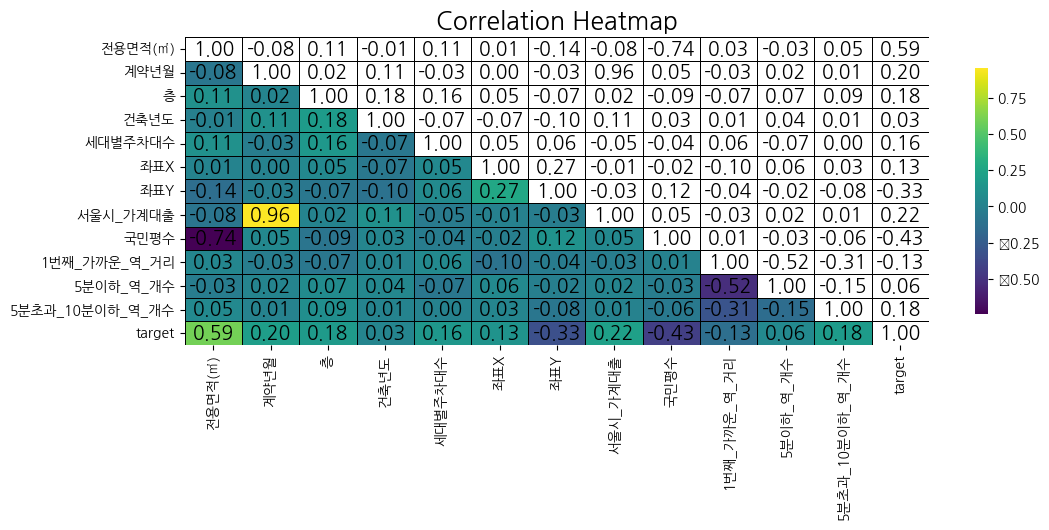

In [52]:
# ÏÉÅÍ¥Ä ÌñâÎ†¨ Í≥ÑÏÇ∞
corr = train[NUMERIC_COLS + [TARGET]].corr()

# ÎßàÏä§ÌÅ¨ ÏÉùÏÑ±
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# ÌûàÌä∏Îßµ Í∑∏Î¶¨Í∏∞
plt.figure(figsize=(12, 4))  # Í∑∏ÎûòÌîÑ ÌÅ¨Í∏∞ Ï°∞Ï†ï
ax = sns.heatmap(corr, mask=mask, cmap='viridis', linewidths=0.5, linecolor='black', cbar_kws={"shrink": .8})

# Í∞Å ÏÖÄÏóê Ïà´Ïûê Ï∂îÍ∞Ä
for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        text = f"{corr.iloc[i, j]:.2f}"
        ax.text(j + 0.5, i + 0.5, text,
                ha='center', va='center',
                color='black',  # Í∏ÄÏûêÏÉâ Í≤ÄÏùÄÏÉâ
                fontsize=14,    # Í∏ÄÏûê ÌÅ¨Í∏∞ Ï°∞Ï†ï
                fontweight='bold')  # Í∏ÄÏûê ÍµµÍ≤å

# ÌÉÄÏù¥ÌãÄ Ï∂îÍ∞Ä
plt.title('Correlation Heatmap', size=18)

# Í∑∏ÎûòÌîÑ ÌëúÏãú
plt.show()

In [53]:
selected_feature_list = ['ÏïÑÌååÌä∏Î™Ö', 'Ï†ÑÏö©Î©¥Ï†Å(„é°)', 'Í≥ÑÏïΩÎÖÑÏõî', 'Ï∏µ', 'Í±¥Ï∂ïÎÖÑÎèÑ', 'Íµ¨', 'Îèô', 'ÎèÑÎ°úÎ™Ö', 'ÏÑ∏ÎåÄÎ≥ÑÏ£ºÏ∞®ÎåÄÏàò', 'Ï¢åÌëúX', 'Ï¢åÌëúY', 'target', 'top_apt', 'Íµ≠ÎØºÌèâÏàò', '1Î≤àÏß∏_Í∞ÄÍπåÏö¥_Ïó≠_Ïù¥Î¶Ñ', '1Î≤àÏß∏_Í∞ÄÍπåÏö¥_Ïó≠_Ìò∏ÏÑ†', '1Î≤àÏß∏_Í∞ÄÍπåÏö¥_Ïó≠_Í±∞Î¶¨', '5Î∂ÑÏù¥Ìïò_Ïó≠_Í∞úÏàò', '5Î∂ÑÏ¥àÍ≥º_10Î∂ÑÏù¥Ìïò_Ïó≠_Í∞úÏàò']
train = train[selected_feature_list]

SEED = 1053682552

# TARGET Ï†ïÏùò
TARGET = 'target'

# NUMERIC_COLS Í≥ÑÏÇ∞: TARGETÏùÑ Ï†úÏô∏Ìïú ÏàòÏπòÌòï Ïª¨Îüº Î¶¨Ïä§Ìä∏
NUMERIC_COLS = [col for col in train.select_dtypes(include=[float, int]).columns if col != TARGET]

# CAT_COLS Í≥ÑÏÇ∞: NUMERIC_COLSÎ•º Ï†úÏô∏Ìïú ÎÇòÎ®∏ÏßÄ Ïª¨Îüº Î¶¨Ïä§Ìä∏
CAT_COLS = [col for col in train.columns if col not in NUMERIC_COLS + [TARGET]]

print(f'Target         --> {TARGET}')
print(f'Numeric Cols   --> {NUMERIC_COLS}')
print(f'Categoric Cols --> {CAT_COLS}')

Target         --> target
Numeric Cols   --> ['Ï†ÑÏö©Î©¥Ï†Å(„é°)', 'Í≥ÑÏïΩÎÖÑÏõî', 'Ï∏µ', 'Í±¥Ï∂ïÎÖÑÎèÑ', 'ÏÑ∏ÎåÄÎ≥ÑÏ£ºÏ∞®ÎåÄÏàò', 'Ï¢åÌëúX', 'Ï¢åÌëúY', 'Íµ≠ÎØºÌèâÏàò', '1Î≤àÏß∏_Í∞ÄÍπåÏö¥_Ïó≠_Í±∞Î¶¨', '5Î∂ÑÏù¥Ìïò_Ïó≠_Í∞úÏàò', '5Î∂ÑÏ¥àÍ≥º_10Î∂ÑÏù¥Ìïò_Ïó≠_Í∞úÏàò']
Categoric Cols --> ['ÏïÑÌååÌä∏Î™Ö', 'Íµ¨', 'Îèô', 'ÎèÑÎ°úÎ™Ö', 'top_apt', '1Î≤àÏß∏_Í∞ÄÍπåÏö¥_Ïó≠_Ïù¥Î¶Ñ', '1Î≤àÏß∏_Í∞ÄÍπåÏö¥_Ïó≠_Ìò∏ÏÑ†']


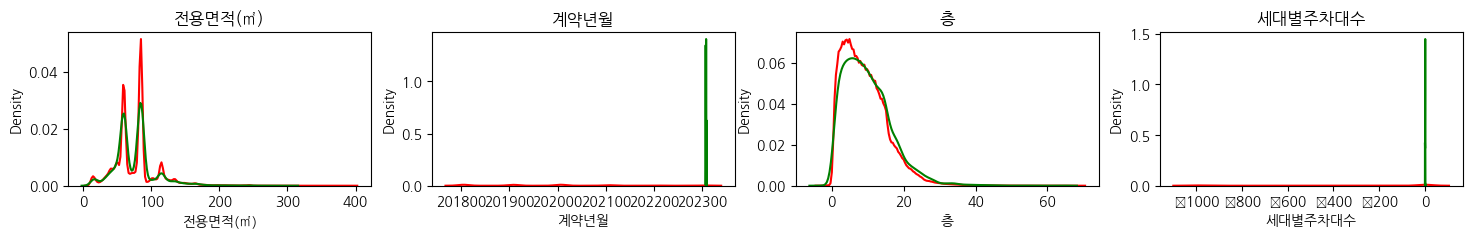

In [54]:
col_list = ['Ï†ÑÏö©Î©¥Ï†Å(„é°)', 'Í≥ÑÏïΩÎÖÑÏõî', 'Ï∏µ', 'ÏÑ∏ÎåÄÎ≥ÑÏ£ºÏ∞®ÎåÄÏàò']

n_cols = len(col_list)
n_rows = math.ceil(len(col_list)/n_cols)
fig, ax = plt.subplots(1,n_cols, figsize=(18, 2))
ax = ax.flatten()
plt.subplots_adjust(wspace=0.2)
for i,c in enumerate(col_list):
    sns.kdeplot(train[c],color='red',ax=ax[i])
    sns.kdeplot(test[c],color='green',ax=ax[i])
    ax[i].set_title(f'{c}')
for j in range(len(col_list),len(ax)):
    ax[j].axis('off')
plt.show()
    

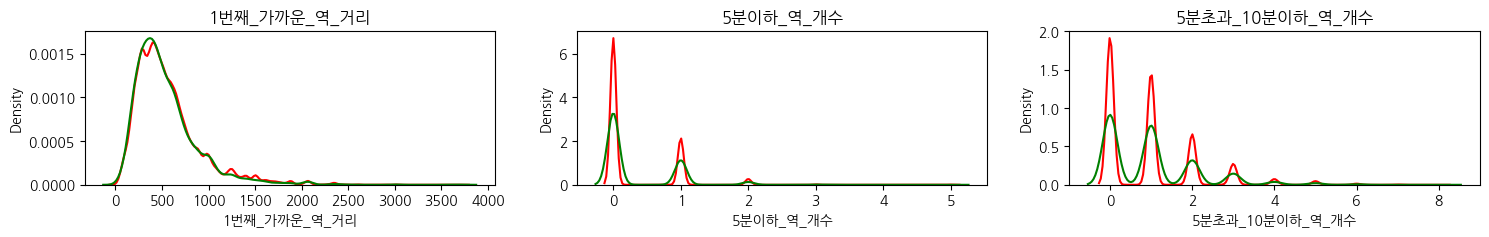

In [55]:
col_list = ['1Î≤àÏß∏_Í∞ÄÍπåÏö¥_Ïó≠_Í±∞Î¶¨', '5Î∂ÑÏù¥Ìïò_Ïó≠_Í∞úÏàò', '5Î∂ÑÏ¥àÍ≥º_10Î∂ÑÏù¥Ìïò_Ïó≠_Í∞úÏàò']

n_cols = len(col_list)
n_rows = math.ceil(len(col_list)/n_cols)
fig, ax = plt.subplots(1,n_cols, figsize=(18, 2))
ax = ax.flatten()
plt.subplots_adjust(wspace=0.2)
for i,c in enumerate(col_list):
    sns.kdeplot(train[c],color='red',ax=ax[i])
    sns.kdeplot(test[c],color='green',ax=ax[i])
    ax[i].set_title(f'{c}')
for j in range(len(col_list),len(ax)):
    ax[j].axis('off')
plt.show()
    

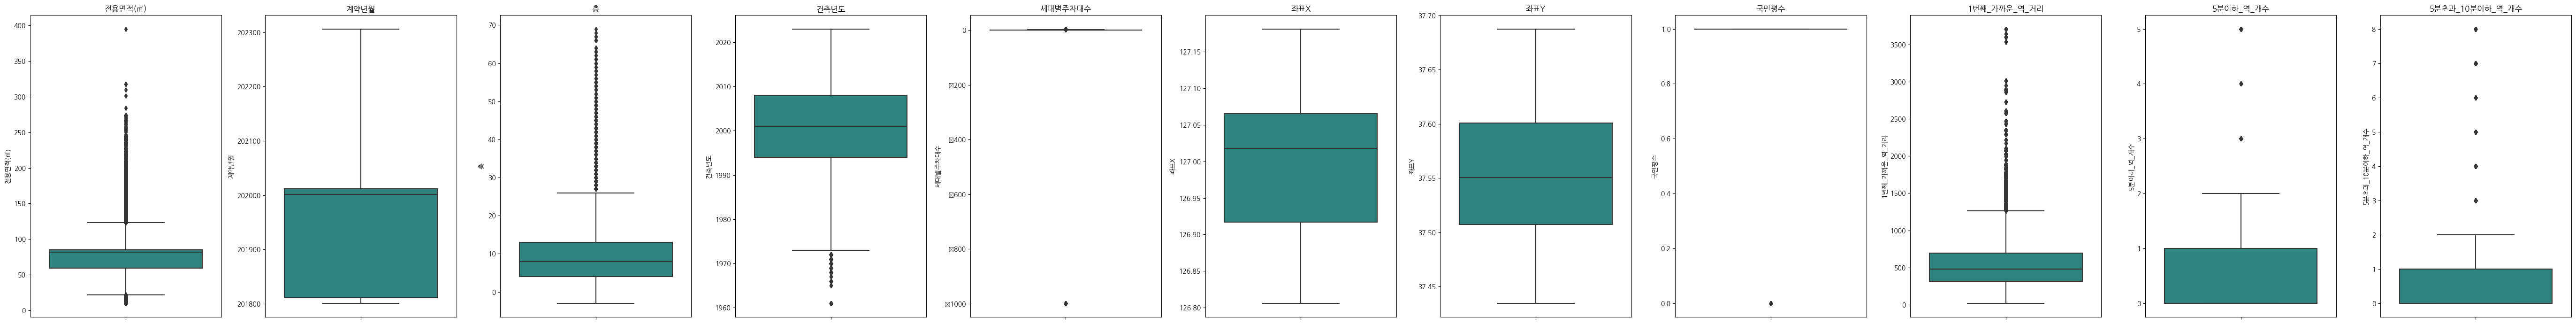

In [56]:
# ÏàòÏπòÌòï ÌîºÏ≤òÎì§Ïóê ÎåÄÌïú Î∞ïÏä§ ÌîåÎ°Ø Í∑∏Î¶¨Í∏∞
fig, axes = plt.subplots(nrows=1, ncols=len(NUMERIC_COLS), figsize=(len(NUMERIC_COLS) * 5, 7))

# Í∞Å ÏàòÏπòÌòï ÌîºÏ≤òÏóê ÎåÄÌï¥ Î∞ïÏä§ ÌîåÎ°ØÏùÑ Í∑∏Î¶ΩÎãàÎã§.
for ax, column in zip(axes, NUMERIC_COLS):
    sns.boxplot(data=train, y=column, ax=ax, palette="viridis")
    ax.set_title(f'{column}')

plt.tight_layout()
plt.show()